In [1]:
import tensorflow as tf

from algos.convex_naf import ConvexNAFAlgorithm
from algos.ddpg import DDPG as MyDDPG
from qfunctions.nn_quadratic_qfunction import NNQuadraticQF
from qfunctions.nn_qfunction import FeedForwardCritic
from qfunctions.quadratic_naf_qfunction import QuadraticNAF
from qfunctions.quadratic_qf import QuadraticQF
from policies.nn_policy import FeedForwardPolicy
from rllab.exploration_strategies.ou_strategy import OUStrategy

from rllab.envs.box2d.cartpole_env import CartpoleEnv
from rllab.envs.normalized_env import normalize

In [2]:
BATCH_SIZE = 128
N_EPOCHS = 100
EPOCH_LENGTH = 100
EVAL_SAMPLES = 100
DISCOUNT = 0.99
QF_LEARNING_RATE = 1e-3
POLICY_LEARNING_RATE = 1e-4
BATCH_LEARNING_RATE = 1e-2
SOFT_TARGET_TAU = 1e-2
REPLAY_POOL_SIZE = 1000000
MIN_POOL_SIZE = 256
SCALE_REWARD = 1.0
QF_WEIGHT_DECAY = 0.01
MAX_PATH_LENGTH = 1000
N_UPDATES_PER_TIME_STEP = 5

In [3]:
env = normalize(CartpoleEnv())
policy_params = dict(
    observation_hidden_sizes=(100, 100),
    hidden_nonlinearity=tf.nn.relu,
    output_nonlinearity=tf.nn.tanh,
)
algo_params = dict(
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    epoch_length=EPOCH_LENGTH,
    eval_samples=EVAL_SAMPLES,
    discount=DISCOUNT,
    policy_learning_rate=POLICY_LEARNING_RATE,
    qf_learning_rate=QF_LEARNING_RATE,
    soft_target_tau=SOFT_TARGET_TAU,
    replay_pool_size=REPLAY_POOL_SIZE,
    min_pool_size=MIN_POOL_SIZE,
    scale_reward=SCALE_REWARD,
    max_path_length=MAX_PATH_LENGTH,
    qf_weight_decay=QF_WEIGHT_DECAY,
)

es = OUStrategy(env_spec=env.spec)
policy = FeedForwardPolicy(
    name_or_scope="policy",
    env_spec=env.spec,
    **policy_params
)
# qf = NNQuadraticQF(
#     name_or_scope="quadratic_qfunction",
#     env_spec=env.spec,
# )
qf = FeedForwardCritic(
    name_or_scope="feed_forward_qfunction",
    env_spec=env.spec,
)
algorithm = MyDDPG(
    env,
    es,
    policy,
    qf,
    **algo_params
)

/Users/vitchyr/git/rail-rl/algos/ddpg.py
qf params =
['feed_forward_qfunction/observation_mlp/hidden0/weights:0', 'feed_forward_qfunction/observation_mlp/hidden0/bias:0', 'feed_forward_qfunction/fusion_mlp/hidden0/weights:0', 'feed_forward_qfunction/fusion_mlp/hidden0/bias:0', 'feed_forward_qfunction/output_linear/weights:0', 'feed_forward_qfunction/output_linear/bias:0']
/Users/vitchyr/git/rail-rl/algos/ddpg.py
policy params =
['policy/hidden0/weights:0', 'policy/hidden0/bias:0', 'policy/hidden1/weights:0', 'policy/hidden1/bias:0', 'policy/weights:0', 'policy/bias:0']


In [4]:
algorithm.train()

2016-12-15 18:18:56.086886 PST | Populating workers...
2016-12-15 18:18:56.088392 PST | Populated
2016-12-15 18:18:56.093610 PST | Epoch #0 | Training started
2016-12-15 18:18:56.224525 PST | Epoch #0 | Training finished. Time: 0.12811279296875
2016-12-15 18:18:56.225385 PST | Epoch #1 | Training started
2016-12-15 18:18:56.302034 PST | Epoch #1 | Training finished. Time: 0.07576704025268555
2016-12-15 18:18:56.302822 PST | Epoch #2 | Training started
2016-12-15 18:18:56.773080 PST | Epoch #2 | Training finished. Time: 0.46953606605529785
2016-12-15 18:18:56.774120 PST | Epoch #2 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:18:56.965377 PST | Epoch #2 | Eval time: 0.1912519931793213
2016-12-15 18:18:56.968705 PST | ----------------------  -------------
2016-12-15 18:18:56.970270 PST | Epoch                     2
2016-12-15 18:18:56.971405 PST | AverageReturn            79.9541
2016-12-15 18:18:56.972743 PST | PolicySurrogateLoss      -5.63825
2016-12-15 18:18:56.974615 PST | QfLoss                   26.4914
2016-12-15 18:18:56.977010 PST | YsMean                    9.28026
2016-12-15 18:18:56.978348 PST | YsStd                     3.28306
2016-12-15 18:18:56.979472 PST | YsMax                    10.8597
2016-12-15 18:18:56.980815 PST | YsMin                     0
2016-12-15 18:18:56.982342 PST | PolicyOutputMean          0.0228426
2016-12-15 18:18:56.983861 PST | PolicyOutputStd           0.00791187
2016-12-15 18:18:56.985928 PST | PolicyOutputMax           0.0490366
2016-12-15 18:18:56.987306 PST | PolicyOutputMin           0.00946559
2016-12-15 18:18:56.988592 PST | TargetPolicyOutputMean 


Total time elapsed: 00:00:00


2016-12-15 18:18:57.010945 PST | ReturnsStd               49.8317
2016-12-15 18:18:57.012402 PST | ReturnsMax              169.947
2016-12-15 18:18:57.013717 PST | ReturnsMin               19.9682
2016-12-15 18:18:57.014561 PST | DiscountedReturnsMean    76.064
2016-12-15 18:18:57.015577 PST | DiscountedReturnsStd     45.6625
2016-12-15 18:18:57.016793 PST | DiscountedReturnsMax    157.01
2016-12-15 18:18:57.017914 PST | DiscountedReturnsMin     19.8684
2016-12-15 18:18:57.018913 PST | TrainingReturnsMean      42.0744
2016-12-15 18:18:57.019984 PST | TrainingReturnsStd       24.323
2016-12-15 18:18:57.020766 PST | TrainingReturnsMax      119.965
2016-12-15 18:18:57.022099 PST | TrainingReturnsMin        9.98188
2016-12-15 18:18:57.023062 PST | ----------------------  -------------
2016-12-15 18:18:57.023834 PST | Epoch #3 | Training started
2016-12-15 18:18:57.572684 PST | Epoch #3 | Training finished. Time: 0.5477688312530518
2016-12-15 18:18:57.573452 PST | Epoch #3 | Collecting samp

0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:18:57.722905 PST | Epoch #3 | Eval time: 0.1494457721710205
2016-12-15 18:18:57.724711 PST | ----------------------  -----------
2016-12-15 18:18:57.726120 PST | Epoch                     3
2016-12-15 18:18:57.728144 PST | AverageReturn            51.0781
2016-12-15 18:18:57.729466 PST | PolicySurrogateLoss     -10.5884
2016-12-15 18:18:57.734904 PST | QfLoss                   24.1599
2016-12-15 18:18:57.737346 PST | YsMean                   12.1014
2016-12-15 18:18:57.739032 PST | YsStd                     5.40418
2016-12-15 18:18:57.741042 PST | YsMax                    17.3271
2016-12-15 18:18:57.742246 PST | YsMin                     0
2016-12-15 18:18:57.744259 PST | PolicyOutputMean          0.461524
2016-12-15 18:18:57.745014 PST | PolicyOutputStd           0.232776
2016-12-15 18:18:57.745875 PST | PolicyOutputMax           0.958101
2016-12-15 18:18:57.746957 PST | PolicyOutputMin           0.16524
2016-12-15 18:18:57.747839 PST | TargetPolicyOutputMean    0.110504


Total time elapsed: 00:00:00


2016-12-15 18:18:57.775913 PST | DiscountedReturnsMax     95.5328
2016-12-15 18:18:57.776980 PST | DiscountedReturnsMin     19.8708
2016-12-15 18:18:57.777823 PST | TrainingReturnsMean      46.0846
2016-12-15 18:18:57.778729 PST | TrainingReturnsStd       30.0191
2016-12-15 18:18:57.779676 PST | TrainingReturnsMax      149.939
2016-12-15 18:18:57.780628 PST | TrainingReturnsMin       19.9708
2016-12-15 18:18:57.781416 PST | ----------------------  -----------
2016-12-15 18:18:57.782329 PST | Epoch #4 | Training started
2016-12-15 18:18:58.430352 PST | Epoch #4 | Training finished. Time: 0.6471447944641113
2016-12-15 18:18:58.431121 PST | Epoch #4 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:18:58.572370 PST | Epoch #4 | Eval time: 0.14123201370239258
2016-12-15 18:18:58.574603 PST | ----------------------  ----------
2016-12-15 18:18:58.576021 PST | Epoch                     4
2016-12-15 18:18:58.577301 PST | AverageReturn            26.0535
2016-12-15 18:18:58.578234 PST | PolicySurrogateLoss     -13.1124
2016-12-15 18:18:58.579084 PST | QfLoss                   22.8402
2016-12-15 18:18:58.580680 PST | YsMean                   12.9496
2016-12-15 18:18:58.582451 PST | YsStd                     8.09417
2016-12-15 18:18:58.584620 PST | YsMax                    20.0753
2016-12-15 18:18:58.585962 PST | YsMin                     0
2016-12-15 18:18:58.586989 PST | PolicyOutputMean          0.897227
2016-12-15 18:18:58.588138 PST | PolicyOutputStd           0.12828
2016-12-15 18:18:58.589560 PST | PolicyOutputMax           0.999999
2016-12-15 18:18:58.590748 PST | PolicyOutputMin           0.659484
2016-12-15 18:18:58.591823 PST | TargetPolicyOutputMean    0.591738


Total time elapsed: 00:00:00


2016-12-15 18:18:59.209741 PST | Epoch #5 | Training finished. Time: 0.5815231800079346
2016-12-15 18:18:59.210602 PST | Epoch #5 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:18:59.335169 PST | Epoch #5 | Eval time: 0.12456202507019043
2016-12-15 18:18:59.336899 PST | ----------------------  -----------
2016-12-15 18:18:59.337815 PST | Epoch                     5
2016-12-15 18:18:59.338501 PST | AverageReturn            24.3178
2016-12-15 18:18:59.339161 PST | PolicySurrogateLoss     -15.0432
2016-12-15 18:18:59.340071 PST | QfLoss                   12.2569
2016-12-15 18:18:59.341166 PST | YsMean                   14.0054
2016-12-15 18:18:59.341964 PST | YsStd                     9.69292
2016-12-15 18:18:59.342772 PST | YsMax                    27.7947
2016-12-15 18:18:59.343697 PST | YsMin                     0
2016-12-15 18:18:59.344696 PST | PolicyOutputMean          0.939151
2016-12-15 18:18:59.345492 PST | PolicyOutputStd           0.0808254
2016-12-15 18:18:59.346105 PST | PolicyOutputMax           1
2016-12-15 18:18:59.346813 PST | PolicyOutputMin           0.784633
2016-12-15 18:18:59.347514 PST | TargetPolicyOutputMean    0.841771
201


Total time elapsed: 00:00:00


2016-12-15 18:18:59.929451 PST | Epoch #6 | Training finished. Time: 0.5539369583129883
2016-12-15 18:18:59.930764 PST | Epoch #6 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:00.041678 PST | Epoch #6 | Eval time: 0.11090612411499023
2016-12-15 18:19:00.043892 PST | ----------------------  ----------
2016-12-15 18:19:00.044853 PST | Epoch                     6
2016-12-15 18:19:00.045626 PST | AverageReturn            50.5577
2016-12-15 18:19:00.046320 PST | PolicySurrogateLoss     -20.5221
2016-12-15 18:19:00.047167 PST | QfLoss                    6.84521
2016-12-15 18:19:00.047855 PST | YsMean                   21.6831
2016-12-15 18:19:00.048534 PST | YsStd                    11.857
2016-12-15 18:19:00.049500 PST | YsMax                    37.4229
2016-12-15 18:19:00.050178 PST | YsMin                     0
2016-12-15 18:19:00.051071 PST | PolicyOutputMean          0.411452
2016-12-15 18:19:00.052236 PST | PolicyOutputStd           0.200005
2016-12-15 18:19:00.052990 PST | PolicyOutputMax           0.894926
2016-12-15 18:19:00.053699 PST | PolicyOutputMin           0.179058
2016-12-15 18:19:00.054532 PST | TargetPolicyOutputMean    0.756077


Total time elapsed: 00:00:00


2016-12-15 18:19:00.635606 PST | Epoch #7 | Training finished. Time: 0.5552749633789062
2016-12-15 18:19:00.636408 PST | Epoch #7 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:00.723539 PST | Epoch #7 | Eval time: 0.08712410926818848
2016-12-15 18:19:00.725235 PST | ----------------------  ------------
2016-12-15 18:19:00.726094 PST | Epoch                     7
2016-12-15 18:19:00.726908 PST | AverageReturn            89.9468
2016-12-15 18:19:00.727648 PST | PolicySurrogateLoss     -27.9649
2016-12-15 18:19:00.728395 PST | QfLoss                   50.7084
2016-12-15 18:19:00.729123 PST | YsMean                   31.0866
2016-12-15 18:19:00.729934 PST | YsStd                    11.4971
2016-12-15 18:19:00.730595 PST | YsMax                    40.3676
2016-12-15 18:19:00.731331 PST | YsMin                     0
2016-12-15 18:19:00.731999 PST | PolicyOutputMean         -0.0213871
2016-12-15 18:19:00.732697 PST | PolicyOutputStd           0.00484344
2016-12-15 18:19:00.733461 PST | PolicyOutputMax          -0.0147117
2016-12-15 18:19:00.734122 PST | PolicyOutputMin          -0.0359275
2016-12-15 18:19:00.734833 PST | TargetPolicyOutputMean    0


Total time elapsed: 00:00:00


2016-12-15 18:19:01.341460 PST | Epoch #8 | Training finished. Time: 0.5790019035339355
2016-12-15 18:19:01.342370 PST | Epoch #8 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:01.455124 PST | Epoch #8 | Eval time: 0.11273884773254395
2016-12-15 18:19:01.457216 PST | ----------------------  ------------
2016-12-15 18:19:01.458335 PST | Epoch                     8
2016-12-15 18:19:01.459461 PST | AverageReturn            76.6099
2016-12-15 18:19:01.460680 PST | PolicySurrogateLoss     -32.291
2016-12-15 18:19:01.462077 PST | QfLoss                   34.6211
2016-12-15 18:19:01.463185 PST | YsMean                   33.9412
2016-12-15 18:19:01.464194 PST | YsStd                    17.5417
2016-12-15 18:19:01.465273 PST | YsMax                    64.4235
2016-12-15 18:19:01.466623 PST | YsMin                     0
2016-12-15 18:19:01.467357 PST | PolicyOutputMean         -0.304645
2016-12-15 18:19:01.468229 PST | PolicyOutputStd           0.182719
2016-12-15 18:19:01.469346 PST | PolicyOutputMax          -0.12034
2016-12-15 18:19:01.470511 PST | PolicyOutputMin          -0.849118
2016-12-15 18:19:01.471599 PST | TargetPolicyOutputMean   -0.016106


Total time elapsed: 00:00:00


2016-12-15 18:19:02.275483 PST | Epoch #9 | Training finished. Time: 0.7736639976501465
2016-12-15 18:19:02.276253 PST | Epoch #9 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:02.444093 PST | Epoch #9 | Eval time: 0.1678321361541748
2016-12-15 18:19:02.445898 PST | ----------------------  ----------
2016-12-15 18:19:02.446651 PST | Epoch                     9
2016-12-15 18:19:02.447667 PST | AverageReturn            27.0186
2016-12-15 18:19:02.448781 PST | PolicySurrogateLoss     -22.3353
2016-12-15 18:19:02.449764 PST | QfLoss                   66.5747
2016-12-15 18:19:02.451155 PST | YsMean                   19.149
2016-12-15 18:19:02.452347 PST | YsStd                    16.2897
2016-12-15 18:19:02.454407 PST | YsMax                    48.4964
2016-12-15 18:19:02.456660 PST | YsMin                     0
2016-12-15 18:19:02.457810 PST | PolicyOutputMean         -0.737854
2016-12-15 18:19:02.458776 PST | PolicyOutputStd           0.211372
2016-12-15 18:19:02.460188 PST | PolicyOutputMax          -0.433073
2016-12-15 18:19:02.461351 PST | PolicyOutputMin          -0.999188
2016-12-15 18:19:02.462447 PST | TargetPolicyOutputMean   -0.414408
2


Total time elapsed: 00:00:00


2016-12-15 18:19:02.480455 PST | TargetQfOutputMin        -1.68308
2016-12-15 18:19:02.481767 PST | RewardsMean               7.29502
2016-12-15 18:19:02.483131 PST | RewardsStd                4.43657
2016-12-15 18:19:02.484481 PST | RewardsMax                9.99979
2016-12-15 18:19:02.486249 PST | RewardsMin                0
2016-12-15 18:19:02.487815 PST | ReturnsMean              27.0186
2016-12-15 18:19:02.489542 PST | ReturnsStd               11.4858
2016-12-15 18:19:02.490813 PST | ReturnsMax               49.9718
2016-12-15 18:19:02.492271 PST | ReturnsMin                9.98075
2016-12-15 18:19:02.494519 PST | DiscountedReturnsMean    26.7242
2016-12-15 18:19:02.495960 PST | DiscountedReturnsStd     11.2344
2016-12-15 18:19:02.497550 PST | DiscountedReturnsMax     48.9826
2016-12-15 18:19:02.498887 PST | DiscountedReturnsMin      9.98075
2016-12-15 18:19:02.500839 PST | TrainingReturnsMean      51.1411
2016-12-15 18:19:02.501963 PST | TrainingReturnsStd       31.5884
2016-12-1

0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:03.442094 PST | Epoch #10 | Eval time: 0.15943694114685059
2016-12-15 18:19:03.444446 PST | ----------------------  ----------
2016-12-15 18:19:03.445418 PST | Epoch                    10
2016-12-15 18:19:03.446387 PST | AverageReturn            28.8247
2016-12-15 18:19:03.447438 PST | PolicySurrogateLoss     -21.2348
2016-12-15 18:19:03.448406 PST | QfLoss                   59.4365
2016-12-15 18:19:03.449380 PST | YsMean                   18.0227
2016-12-15 18:19:03.450324 PST | YsStd                    15.934
2016-12-15 18:19:03.451385 PST | YsMax                    52.5811
2016-12-15 18:19:03.452332 PST | YsMin                     0
2016-12-15 18:19:03.453370 PST | PolicyOutputMean         -0.814505
2016-12-15 18:19:03.454328 PST | PolicyOutputStd           0.174275
2016-12-15 18:19:03.455384 PST | PolicyOutputMax          -0.536355
2016-12-15 18:19:03.456471 PST | PolicyOutputMin          -0.999835
2016-12-15 18:19:03.457449 PST | TargetPolicyOutputMean   -0.704029


Total time elapsed: 00:00:00


2016-12-15 18:19:03.485724 PST | Epoch #11 | Training started
2016-12-15 18:19:04.077366 PST | Epoch #11 | Training finished. Time: 0.5903830528259277
2016-12-15 18:19:04.078128 PST | Epoch #11 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:04.194121 PST | Epoch #11 | Eval time: 0.1159830093383789
2016-12-15 18:19:04.196019 PST | ----------------------  ----------
2016-12-15 18:19:04.196954 PST | Epoch                    11
2016-12-15 18:19:04.198159 PST | AverageReturn            54.9698
2016-12-15 18:19:04.199388 PST | PolicySurrogateLoss     -23.5257
2016-12-15 18:19:04.200589 PST | QfLoss                   32.374
2016-12-15 18:19:04.201646 PST | YsMean                   26.4297
2016-12-15 18:19:04.202730 PST | YsStd                    18.1265
2016-12-15 18:19:04.203587 PST | YsMax                    58.4655
2016-12-15 18:19:04.204831 PST | YsMin                     0
2016-12-15 18:19:04.205965 PST | PolicyOutputMean         -0.412198
2016-12-15 18:19:04.207095 PST | PolicyOutputStd           0.161975
2016-12-15 18:19:04.207976 PST | PolicyOutputMax          -0.185998
2016-12-15 18:19:04.208831 PST | PolicyOutputMin          -0.821232
2016-12-15 18:19:04.209944 PST | TargetPolicyOutputMean   -0.658254



Total time elapsed: 00:00:00


2016-12-15 18:19:04.856019 PST | Epoch #12 | Training finished. Time: 0.6152200698852539
2016-12-15 18:19:04.856803 PST | Epoch #12 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:04.940471 PST | Epoch #12 | Eval time: 0.08365702629089355
2016-12-15 18:19:04.942344 PST | ----------------------  -----------
2016-12-15 18:19:04.943229 PST | Epoch                    12
2016-12-15 18:19:04.944410 PST | AverageReturn           264.912
2016-12-15 18:19:04.945445 PST | PolicySurrogateLoss     -36.4391
2016-12-15 18:19:04.946664 PST | QfLoss                  126.452
2016-12-15 18:19:04.947926 PST | YsMean                   44.6691
2016-12-15 18:19:04.948986 PST | YsStd                    14.411
2016-12-15 18:19:04.949898 PST | YsMax                    64.5015
2016-12-15 18:19:04.950950 PST | YsMin                     0
2016-12-15 18:19:04.952200 PST | PolicyOutputMean         -0.0230535
2016-12-15 18:19:04.953375 PST | PolicyOutputStd           0.0509255
2016-12-15 18:19:04.954581 PST | PolicyOutputMax           0.0791631
2016-12-15 18:19:04.955699 PST | PolicyOutputMin          -0.15466
2016-12-15 18:19:04.956834 PST | TargetPolicyOutputMean   -0.22900


Total time elapsed: 00:00:00


2016-12-15 18:19:05.674556 PST | Epoch #13 | Training finished. Time: 0.6848390102386475
2016-12-15 18:19:05.675419 PST | Epoch #13 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:05.757158 PST | Epoch #13 | Eval time: 0.08172798156738281
2016-12-15 18:19:05.759244 PST | ----------------------  ------------
2016-12-15 18:19:05.760062 PST | Epoch                    13
2016-12-15 18:19:05.761002 PST | AverageReturn           333.235
2016-12-15 18:19:05.762055 PST | PolicySurrogateLoss     -33.0392
2016-12-15 18:19:05.763645 PST | QfLoss                   90.1537
2016-12-15 18:19:05.764956 PST | YsMean                   39.4132
2016-12-15 18:19:05.766262 PST | YsStd                    12.9434
2016-12-15 18:19:05.767622 PST | YsMax                    51.5155
2016-12-15 18:19:05.768536 PST | YsMin                     0
2016-12-15 18:19:05.769734 PST | PolicyOutputMean          0.00599262
2016-12-15 18:19:05.770731 PST | PolicyOutputStd           0.0852503
2016-12-15 18:19:05.771564 PST | PolicyOutputMax           0.287915
2016-12-15 18:19:05.772865 PST | PolicyOutputMin          -0.394874
2016-12-15 18:19:05.773951 PST | TargetPolicyOutputMean   -0.1


Total time elapsed: 00:00:00


2016-12-15 18:19:06.508729 PST | Epoch #14 | Training finished. Time: 0.689054012298584
2016-12-15 18:19:06.509496 PST | Epoch #14 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:06.591843 PST | Epoch #14 | Eval time: 0.08233499526977539
2016-12-15 18:19:06.593692 PST | ----------------------  -----------
2016-12-15 18:19:06.594750 PST | Epoch                    14
2016-12-15 18:19:06.595887 PST | AverageReturn           326.547
2016-12-15 18:19:06.597614 PST | PolicySurrogateLoss     -44.2493
2016-12-15 18:19:06.598593 PST | QfLoss                  133.087
2016-12-15 18:19:06.599693 PST | YsMean                   48.9185
2016-12-15 18:19:06.600841 PST | YsStd                     9.86277
2016-12-15 18:19:06.601793 PST | YsMax                    65.6703
2016-12-15 18:19:06.602977 PST | YsMin                     0
2016-12-15 18:19:06.604117 PST | PolicyOutputMean          0.0274779
2016-12-15 18:19:06.605022 PST | PolicyOutputStd           0.28727
2016-12-15 18:19:06.606026 PST | PolicyOutputMax           0.454373
2016-12-15 18:19:06.607024 PST | PolicyOutputMin          -0.479775
2016-12-15 18:19:06.608291 PST | TargetPolicyOutputMean    0.01055


Total time elapsed: 00:00:00


2016-12-15 18:19:07.432030 PST | Epoch #15 | Training finished. Time: 0.7902979850769043
2016-12-15 18:19:07.432922 PST | Epoch #15 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:07.525072 PST | Epoch #15 | Eval time: 0.09214210510253906
2016-12-15 18:19:07.526962 PST | ----------------------  -----------
2016-12-15 18:19:07.528205 PST | Epoch                    15
2016-12-15 18:19:07.529151 PST | AverageReturn           207.872
2016-12-15 18:19:07.530179 PST | PolicySurrogateLoss     -48.8349
2016-12-15 18:19:07.531412 PST | QfLoss                  235.262
2016-12-15 18:19:07.532164 PST | YsMean                   53.2473
2016-12-15 18:19:07.533229 PST | YsStd                    13.7751
2016-12-15 18:19:07.534360 PST | YsMax                    74.9368
2016-12-15 18:19:07.535847 PST | YsMin                     0
2016-12-15 18:19:07.537039 PST | PolicyOutputMean          0.0117528
2016-12-15 18:19:07.538211 PST | PolicyOutputStd           0.380456
2016-12-15 18:19:07.539348 PST | PolicyOutputMax           0.619109
2016-12-15 18:19:07.540453 PST | PolicyOutputMin          -0.678238
2016-12-15 18:19:07.541333 PST | TargetPolicyOutputMean    0.05342


Total time elapsed: 00:00:00


2016-12-15 18:19:08.201802 PST | Epoch #16 | Training finished. Time: 0.6093311309814453
2016-12-15 18:19:08.202866 PST | Epoch #16 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:08.304504 PST | Epoch #16 | Eval time: 0.10166788101196289
2016-12-15 18:19:08.306561 PST | ----------------------  -----------
2016-12-15 18:19:08.307426 PST | Epoch                    16
2016-12-15 18:19:08.308565 PST | AverageReturn           242.345
2016-12-15 18:19:08.309996 PST | PolicySurrogateLoss     -52.5762
2016-12-15 18:19:08.311616 PST | QfLoss                  198.298
2016-12-15 18:19:08.312430 PST | YsMean                   56.1288
2016-12-15 18:19:08.313643 PST | YsStd                    12.8216
2016-12-15 18:19:08.314632 PST | YsMax                    78.0762
2016-12-15 18:19:08.315530 PST | YsMin                     0
2016-12-15 18:19:08.316731 PST | PolicyOutputMean          0.0107568
2016-12-15 18:19:08.317850 PST | PolicyOutputStd           0.432187
2016-12-15 18:19:08.318774 PST | PolicyOutputMax           0.654917
2016-12-15 18:19:08.319816 PST | PolicyOutputMin          -0.78605
2016-12-15 18:19:08.320882 PST | TargetPolicyOutputMean   -0.042699


Total time elapsed: 00:00:00


2016-12-15 18:19:08.989975 PST | Epoch #17 | Training finished. Time: 0.6372799873352051
2016-12-15 18:19:08.991713 PST | Epoch #17 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:09.097626 PST | Epoch #17 | Eval time: 0.10590386390686035
2016-12-15 18:19:09.099614 PST | ----------------------  -----------
2016-12-15 18:19:09.100588 PST | Epoch                    17
2016-12-15 18:19:09.101790 PST | AverageReturn           419.875
2016-12-15 18:19:09.103306 PST | PolicySurrogateLoss     -50.6804
2016-12-15 18:19:09.104526 PST | QfLoss                  129.028
2016-12-15 18:19:09.105624 PST | YsMean                   56.1804
2016-12-15 18:19:09.106985 PST | YsStd                     9.33375
2016-12-15 18:19:09.108082 PST | YsMax                    68.6768
2016-12-15 18:19:09.109133 PST | YsMin                     0
2016-12-15 18:19:09.110202 PST | PolicyOutputMean          0.0109645
2016-12-15 18:19:09.111370 PST | PolicyOutputStd           0.626152
2016-12-15 18:19:09.112563 PST | PolicyOutputMax           0.889143
2016-12-15 18:19:09.113573 PST | PolicyOutputMin          -0.730136
2016-12-15 18:19:09.114592 PST | TargetPolicyOutputMean    0.0311


Total time elapsed: 00:00:00


2016-12-15 18:19:09.783525 PST | Epoch #18 | Training finished. Time: 0.6385190486907959
2016-12-15 18:19:09.784322 PST | Epoch #18 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:09.874176 PST | Epoch #18 | Eval time: 0.08984589576721191
2016-12-15 18:19:09.876048 PST | ----------------------  -----------
2016-12-15 18:19:09.876989 PST | Epoch                    18
2016-12-15 18:19:09.878279 PST | AverageReturn           223.842
2016-12-15 18:19:09.879543 PST | PolicySurrogateLoss     -60.8846
2016-12-15 18:19:09.880848 PST | QfLoss                  263.956
2016-12-15 18:19:09.881835 PST | YsMean                   63.6171
2016-12-15 18:19:09.882747 PST | YsStd                    16.0313
2016-12-15 18:19:09.885141 PST | YsMax                    82.9088
2016-12-15 18:19:09.886492 PST | YsMin                     0
2016-12-15 18:19:09.888288 PST | PolicyOutputMean         -0.0260896
2016-12-15 18:19:09.889822 PST | PolicyOutputStd           0.651586
2016-12-15 18:19:09.894638 PST | PolicyOutputMax           0.842768
2016-12-15 18:19:09.896808 PST | PolicyOutputMin          -0.939693
2016-12-15 18:19:09.898265 PST | TargetPolicyOutputMean   -0.04199


Total time elapsed: 00:00:00


2016-12-15 18:19:10.574740 PST | Epoch #19 | Training finished. Time: 0.6432180404663086
2016-12-15 18:19:10.575510 PST | Epoch #19 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:10.669367 PST | Epoch #19 | Eval time: 0.09384584426879883
2016-12-15 18:19:10.671188 PST | ----------------------  -----------
2016-12-15 18:19:10.672299 PST | Epoch                    19
2016-12-15 18:19:10.673105 PST | AverageReturn           314.845
2016-12-15 18:19:10.674199 PST | PolicySurrogateLoss     -60.8963
2016-12-15 18:19:10.674991 PST | QfLoss                  341.703
2016-12-15 18:19:10.676118 PST | YsMean                   62.9248
2016-12-15 18:19:10.676953 PST | YsStd                    13.3687
2016-12-15 18:19:10.678074 PST | YsMax                    80.5158
2016-12-15 18:19:10.678857 PST | YsMin                     0
2016-12-15 18:19:10.679935 PST | PolicyOutputMean          0.0515386
2016-12-15 18:19:10.680942 PST | PolicyOutputStd           0.869751
2016-12-15 18:19:10.681919 PST | PolicyOutputMax           0.958952
2016-12-15 18:19:10.683278 PST | PolicyOutputMin          -0.96397
2016-12-15 18:19:10.684232 PST | TargetPolicyOutputMean    0.075888


Total time elapsed: 00:00:00


2016-12-15 18:19:11.312361 PST | Epoch #20 | Training finished. Time: 0.5969469547271729
2016-12-15 18:19:11.313207 PST | Epoch #20 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:11.393548 PST | Epoch #20 | Eval time: 0.08033084869384766
2016-12-15 18:19:11.395545 PST | ----------------------  ------------
2016-12-15 18:19:11.396869 PST | Epoch                    20
2016-12-15 18:19:11.397644 PST | AverageReturn           193.836
2016-12-15 18:19:11.398548 PST | PolicySurrogateLoss     -69.2088
2016-12-15 18:19:11.399594 PST | QfLoss                  644.718
2016-12-15 18:19:11.400410 PST | YsMean                   68.0469
2016-12-15 18:19:11.401479 PST | YsStd                    18.5981
2016-12-15 18:19:11.402289 PST | YsMax                    87.5273
2016-12-15 18:19:11.403301 PST | YsMin                     0
2016-12-15 18:19:11.404144 PST | PolicyOutputMean          0.00318754
2016-12-15 18:19:11.405197 PST | PolicyOutputStd           0.87897
2016-12-15 18:19:11.406033 PST | PolicyOutputMax           0.999003
2016-12-15 18:19:11.407063 PST | PolicyOutputMin          -0.994972
2016-12-15 18:19:11.407803 PST | TargetPolicyOutputMean   -0.1080


Total time elapsed: 00:00:00


2016-12-15 18:19:12.045351 PST | Epoch #21 | Training finished. Time: 0.6092419624328613
2016-12-15 18:19:12.046137 PST | Epoch #21 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:12.145555 PST | Epoch #21 | Eval time: 0.09940481185913086
2016-12-15 18:19:12.147412 PST | ----------------------  -----------
2016-12-15 18:19:12.148299 PST | Epoch                    21
2016-12-15 18:19:12.149292 PST | AverageReturn           249.83
2016-12-15 18:19:12.150280 PST | PolicySurrogateLoss     -72.5458
2016-12-15 18:19:12.151106 PST | QfLoss                  497.662
2016-12-15 18:19:12.152332 PST | YsMean                   73.4074
2016-12-15 18:19:12.153173 PST | YsStd                    17.4374
2016-12-15 18:19:12.154248 PST | YsMax                    92.0217
2016-12-15 18:19:12.155488 PST | YsMin                     0
2016-12-15 18:19:12.156524 PST | PolicyOutputMean          0.0114646
2016-12-15 18:19:12.157379 PST | PolicyOutputStd           0.896786
2016-12-15 18:19:12.158637 PST | PolicyOutputMax           0.999547
2016-12-15 18:19:12.159456 PST | PolicyOutputMin          -0.999879
2016-12-15 18:19:12.160463 PST | TargetPolicyOutputMean    0.010951


Total time elapsed: 00:00:00


2016-12-15 18:19:12.781981 PST | Epoch #22 | Training finished. Time: 0.5925428867340088
2016-12-15 18:19:12.783038 PST | Epoch #22 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:12.863420 PST | Epoch #22 | Eval time: 0.08037519454956055
2016-12-15 18:19:12.865296 PST | ----------------------  -----------
2016-12-15 18:19:12.866393 PST | Epoch                    22
2016-12-15 18:19:12.867274 PST | AverageReturn           242.332
2016-12-15 18:19:12.868291 PST | PolicySurrogateLoss     -80.3837
2016-12-15 18:19:12.869282 PST | QfLoss                  490.635
2016-12-15 18:19:12.870445 PST | YsMean                   78.6612
2016-12-15 18:19:12.871258 PST | YsStd                    18.9734
2016-12-15 18:19:12.872362 PST | YsMax                   101.98
2016-12-15 18:19:12.873194 PST | YsMin                     0
2016-12-15 18:19:12.875158 PST | PolicyOutputMean          0.0352482
2016-12-15 18:19:12.876103 PST | PolicyOutputStd           0.896834
2016-12-15 18:19:12.877346 PST | PolicyOutputMax           0.999987
2016-12-15 18:19:12.878213 PST | PolicyOutputMin          -0.999987
2016-12-15 18:19:12.879386 PST | TargetPolicyOutputMean    0.0853979


Total time elapsed: 00:00:00


2016-12-15 18:19:13.464415 PST | Epoch #23 | Training finished. Time: 0.5500249862670898
2016-12-15 18:19:13.465311 PST | Epoch #23 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:13.564930 PST | Epoch #23 | Eval time: 0.0996100902557373
2016-12-15 18:19:13.566746 PST | ----------------------  -----------
2016-12-15 18:19:13.567686 PST | Epoch                    23
2016-12-15 18:19:13.568928 PST | AverageReturn           254.824
2016-12-15 18:19:13.570037 PST | PolicySurrogateLoss     -84.6143
2016-12-15 18:19:13.571318 PST | QfLoss                  349.834
2016-12-15 18:19:13.572154 PST | YsMean                   83.7331
2016-12-15 18:19:13.573297 PST | YsStd                    21.0462
2016-12-15 18:19:13.574533 PST | YsMax                   114.787
2016-12-15 18:19:13.575591 PST | YsMin                     0
2016-12-15 18:19:13.576588 PST | PolicyOutputMean         -0.0297579
2016-12-15 18:19:13.577951 PST | PolicyOutputStd           0.918398
2016-12-15 18:19:13.578767 PST | PolicyOutputMax           1
2016-12-15 18:19:13.580045 PST | PolicyOutputMin          -0.999989
2016-12-15 18:19:13.581076 PST | TargetPolicyOutputMean   -0.0763226
2016-1


Total time elapsed: 00:00:00


2016-12-15 18:19:14.142409 PST | Epoch #24 | Training finished. Time: 0.5294880867004395
2016-12-15 18:19:14.143175 PST | Epoch #24 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:14.217897 PST | Epoch #24 | Eval time: 0.07471108436584473
2016-12-15 18:19:14.219832 PST | ----------------------  -----------
2016-12-15 18:19:14.220646 PST | Epoch                    24
2016-12-15 18:19:14.221442 PST | AverageReturn           323.122
2016-12-15 18:19:14.222340 PST | PolicySurrogateLoss     -84.9959
2016-12-15 18:19:14.223280 PST | QfLoss                  272.6
2016-12-15 18:19:14.224510 PST | YsMean                   86.3629
2016-12-15 18:19:14.225444 PST | YsStd                    24.509
2016-12-15 18:19:14.226641 PST | YsMax                   122.412
2016-12-15 18:19:14.227796 PST | YsMin                     0
2016-12-15 18:19:14.228670 PST | PolicyOutputMean          0.0427214
2016-12-15 18:19:14.229648 PST | PolicyOutputStd           0.921453
2016-12-15 18:19:14.230444 PST | PolicyOutputMax           1
2016-12-15 18:19:14.231684 PST | PolicyOutputMin          -0.999994
2016-12-15 18:19:14.232750 PST | TargetPolicyOutputMean   -0.0384437
2016-12-


Total time elapsed: 00:00:00


2016-12-15 18:19:14.846456 PST | Epoch #25 | Training finished. Time: 0.5824480056762695
2016-12-15 18:19:14.847277 PST | Epoch #25 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:14.939031 PST | Epoch #25 | Eval time: 0.09174585342407227
2016-12-15 18:19:14.940953 PST | ----------------------  -----------
2016-12-15 18:19:14.942056 PST | Epoch                    25
2016-12-15 18:19:14.942972 PST | AverageReturn           366.456
2016-12-15 18:19:14.944353 PST | PolicySurrogateLoss     -96.6909
2016-12-15 18:19:14.945325 PST | QfLoss                  198.916
2016-12-15 18:19:14.946462 PST | YsMean                   95.0214
2016-12-15 18:19:14.947336 PST | YsStd                    29.0182
2016-12-15 18:19:14.948652 PST | YsMax                   134.194
2016-12-15 18:19:14.949652 PST | YsMin                     0
2016-12-15 18:19:14.950613 PST | PolicyOutputMean          0.0365178
2016-12-15 18:19:14.951680 PST | PolicyOutputStd           0.932466
2016-12-15 18:19:14.952626 PST | PolicyOutputMax           1
2016-12-15 18:19:14.953920 PST | PolicyOutputMin          -0.999997
2016-12-15 18:19:14.954944 PST | TargetPolicyOutputMean   -0.0537149
2016-


Total time elapsed: 00:00:00


2016-12-15 18:19:15.575858 PST | Epoch #26 | Training finished. Time: 0.589730978012085
2016-12-15 18:19:15.576882 PST | Epoch #26 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:15.652195 PST | Epoch #26 | Eval time: 0.07530403137207031
2016-12-15 18:19:15.654202 PST | ----------------------  ------------
2016-12-15 18:19:15.655229 PST | Epoch                     26
2016-12-15 18:19:15.656640 PST | AverageReturn            333.148
2016-12-15 18:19:15.657788 PST | PolicySurrogateLoss     -108.357
2016-12-15 18:19:15.659033 PST | QfLoss                   488.525
2016-12-15 18:19:15.660039 PST | YsMean                   100.364
2016-12-15 18:19:15.660930 PST | YsStd                     29.5381
2016-12-15 18:19:15.662109 PST | YsMax                    145.418
2016-12-15 18:19:15.663052 PST | YsMin                      0
2016-12-15 18:19:15.663909 PST | PolicyOutputMean           0.0274829
2016-12-15 18:19:15.664705 PST | PolicyOutputStd            0.930007
2016-12-15 18:19:15.665567 PST | PolicyOutputMax            1
2016-12-15 18:19:15.666585 PST | PolicyOutputMin           -1
2016-12-15 18:19:15.667625 PST | TargetPolicyOutputMean    -0.0403799



Total time elapsed: 00:00:00


2016-12-15 18:19:16.233962 PST | Epoch #27 | Training finished. Time: 0.5359330177307129
2016-12-15 18:19:16.235029 PST | Epoch #27 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:16.315775 PST | Epoch #27 | Eval time: 0.08073997497558594
2016-12-15 18:19:16.317659 PST | ----------------------  -------------
2016-12-15 18:19:16.318621 PST | Epoch                     27
2016-12-15 18:19:16.319722 PST | AverageReturn            363.155
2016-12-15 18:19:16.320821 PST | PolicySurrogateLoss     -109.785
2016-12-15 18:19:16.322029 PST | QfLoss                   178.809
2016-12-15 18:19:16.323094 PST | YsMean                   109.172
2016-12-15 18:19:16.324249 PST | YsStd                     30.8748
2016-12-15 18:19:16.325362 PST | YsMax                    145.61
2016-12-15 18:19:16.326284 PST | YsMin                      0
2016-12-15 18:19:16.327532 PST | PolicyOutputMean          -0.00714838
2016-12-15 18:19:16.328820 PST | PolicyOutputStd            0.942384
2016-12-15 18:19:16.329746 PST | PolicyOutputMax            1
2016-12-15 18:19:16.330851 PST | PolicyOutputMin           -1
2016-12-15 18:19:16.331931 PST | TargetPolicyOutputMean     0.0351797


Total time elapsed: 00:00:00


2016-12-15 18:19:16.944527 PST | Epoch #28 | Training finished. Time: 0.5805978775024414
2016-12-15 18:19:16.945292 PST | Epoch #28 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:17.043568 PST | Epoch #28 | Eval time: 0.09823989868164062
2016-12-15 18:19:17.046289 PST | ----------------------  ------------
2016-12-15 18:19:17.048664 PST | Epoch                     28
2016-12-15 18:19:17.050343 PST | AverageReturn            389.825
2016-12-15 18:19:17.052199 PST | PolicySurrogateLoss     -119.566
2016-12-15 18:19:17.053505 PST | QfLoss                   236.586
2016-12-15 18:19:17.055070 PST | YsMean                   116.942
2016-12-15 18:19:17.056516 PST | YsStd                     32.5855
2016-12-15 18:19:17.057696 PST | YsMax                    159.147
2016-12-15 18:19:17.058888 PST | YsMin                      0
2016-12-15 18:19:17.060035 PST | PolicyOutputMean           0.0230219
2016-12-15 18:19:17.061356 PST | PolicyOutputStd            0.942248
2016-12-15 18:19:17.062656 PST | PolicyOutputMax            1
2016-12-15 18:19:17.063950 PST | PolicyOutputMin           -1
2016-12-15 18:19:17.064953 PST | TargetPolicyOutputMean     0.0764963



Total time elapsed: 00:00:00


2016-12-15 18:19:17.722929 PST | Epoch #29 | Training finished. Time: 0.6190121173858643
2016-12-15 18:19:17.723855 PST | Epoch #29 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:17.817617 PST | Epoch #29 | Eval time: 0.09375381469726562
2016-12-15 18:19:17.819511 PST | ----------------------  ------------
2016-12-15 18:19:17.820369 PST | Epoch                     29
2016-12-15 18:19:17.822120 PST | AverageReturn            376.446
2016-12-15 18:19:17.823197 PST | PolicySurrogateLoss     -118.445
2016-12-15 18:19:17.824064 PST | QfLoss                   313.736
2016-12-15 18:19:17.825089 PST | YsMean                   122.778
2016-12-15 18:19:17.826097 PST | YsStd                     43.4481
2016-12-15 18:19:17.827421 PST | YsMax                    185.241
2016-12-15 18:19:17.828993 PST | YsMin                      0
2016-12-15 18:19:17.831715 PST | PolicyOutputMean           0.0767106
2016-12-15 18:19:17.833055 PST | PolicyOutputStd            0.955785
2016-12-15 18:19:17.833954 PST | PolicyOutputMax            1
2016-12-15 18:19:17.834833 PST | PolicyOutputMin           -1
2016-12-15 18:19:17.835978 PST | TargetPolicyOutputMean     0.0674663



Total time elapsed: 00:00:00


2016-12-15 18:19:18.462834 PST | Epoch #30 | Training finished. Time: 0.5947690010070801
2016-12-15 18:19:18.463635 PST | Epoch #30 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:18.557139 PST | Epoch #30 | Eval time: 0.09349489212036133
2016-12-15 18:19:18.559186 PST | ----------------------  ------------
2016-12-15 18:19:18.560301 PST | Epoch                     30
2016-12-15 18:19:18.561192 PST | AverageReturn            302.34
2016-12-15 18:19:18.562205 PST | PolicySurrogateLoss     -131.423
2016-12-15 18:19:18.563459 PST | QfLoss                   199.168
2016-12-15 18:19:18.564324 PST | YsMean                   127.753
2016-12-15 18:19:18.565215 PST | YsStd                     38.4625
2016-12-15 18:19:18.566558 PST | YsMax                    175.278
2016-12-15 18:19:18.568399 PST | YsMin                      0
2016-12-15 18:19:18.570459 PST | PolicyOutputMean          -0.0586815
2016-12-15 18:19:18.571385 PST | PolicyOutputStd            0.933459
2016-12-15 18:19:18.572495 PST | PolicyOutputMax            1
2016-12-15 18:19:18.573431 PST | PolicyOutputMin           -1
2016-12-15 18:19:18.574472 PST | TargetPolicyOutputMean    -0.0094754
2


Total time elapsed: 00:00:00


2016-12-15 18:19:19.163118 PST | Epoch #31 | Training finished. Time: 0.5551831722259521
2016-12-15 18:19:19.163885 PST | Epoch #31 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:19.237239 PST | Epoch #31 | Eval time: 0.07334685325622559
2016-12-15 18:19:19.239127 PST | ----------------------  ------------
2016-12-15 18:19:19.240066 PST | Epoch                     31
2016-12-15 18:19:19.242748 PST | AverageReturn            509.793
2016-12-15 18:19:19.244458 PST | PolicySurrogateLoss     -158.126
2016-12-15 18:19:19.245989 PST | QfLoss                   155.507
2016-12-15 18:19:19.247135 PST | YsMean                   153.086
2016-12-15 18:19:19.251601 PST | YsStd                     40.4849
2016-12-15 18:19:19.253298 PST | YsMax                    191.581
2016-12-15 18:19:19.254216 PST | YsMin                      0
2016-12-15 18:19:19.255209 PST | PolicyOutputMean          -0.0412712
2016-12-15 18:19:19.256101 PST | PolicyOutputStd            0.944835
2016-12-15 18:19:19.257061 PST | PolicyOutputMax            1
2016-12-15 18:19:19.258384 PST | PolicyOutputMin           -1
2016-12-15 18:19:19.259414 PST | TargetPolicyOutputMean    -0.0370642



Total time elapsed: 00:00:00


2016-12-15 18:19:19.843317 PST | Epoch #32 | Training finished. Time: 0.5527560710906982
2016-12-15 18:19:19.844085 PST | Epoch #32 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:19.918768 PST | Epoch #32 | Eval time: 0.07467007637023926
2016-12-15 18:19:19.920659 PST | ----------------------  --------------
2016-12-15 18:19:19.921613 PST | Epoch                     32
2016-12-15 18:19:19.922840 PST | AverageReturn            524.823
2016-12-15 18:19:19.923803 PST | PolicySurrogateLoss     -175.45
2016-12-15 18:19:19.924977 PST | QfLoss                   336.983
2016-12-15 18:19:19.925974 PST | YsMean                   169.647
2016-12-15 18:19:19.927009 PST | YsStd                     40.451
2016-12-15 18:19:19.928212 PST | YsMax                    209.501
2016-12-15 18:19:19.929462 PST | YsMin                      0
2016-12-15 18:19:19.930453 PST | PolicyOutputMean          -0.000103137
2016-12-15 18:19:19.931553 PST | PolicyOutputStd            0.977959
2016-12-15 18:19:19.932748 PST | PolicyOutputMax            1
2016-12-15 18:19:19.933645 PST | PolicyOutputMin           -1
2016-12-15 18:19:19.934471 PST | TargetPolicyOutputMean     0.014024


Total time elapsed: 00:00:00


2016-12-15 18:19:20.601138 PST | Epoch #33 | Training finished. Time: 0.6357190608978271
2016-12-15 18:19:20.601908 PST | Epoch #33 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:20.692529 PST | Epoch #33 | Eval time: 0.09059786796569824
2016-12-15 18:19:20.695582 PST | ----------------------  -------------
2016-12-15 18:19:20.696853 PST | Epoch                     33
2016-12-15 18:19:20.698167 PST | AverageReturn            403.166
2016-12-15 18:19:20.699463 PST | PolicySurrogateLoss     -178.669
2016-12-15 18:19:20.700714 PST | QfLoss                   296.327
2016-12-15 18:19:20.702094 PST | YsMean                   170.42
2016-12-15 18:19:20.703188 PST | YsStd                     47.3694
2016-12-15 18:19:20.704087 PST | YsMax                    219.582
2016-12-15 18:19:20.704946 PST | YsMin                      0
2016-12-15 18:19:20.706157 PST | PolicyOutputMean          -0.0380476
2016-12-15 18:19:20.707030 PST | PolicyOutputStd            0.972081
2016-12-15 18:19:20.708061 PST | PolicyOutputMax            1
2016-12-15 18:19:20.709062 PST | PolicyOutputMin           -1
2016-12-15 18:19:20.709896 PST | TargetPolicyOutputMean    -0.00866838


Total time elapsed: 00:00:00


2016-12-15 18:19:21.343519 PST | Epoch #34 | Training finished. Time: 0.6030430793762207
2016-12-15 18:19:21.345032 PST | Epoch #34 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:21.430557 PST | Epoch #34 | Eval time: 0.0855250358581543
2016-12-15 18:19:21.432409 PST | ----------------------  ------------
2016-12-15 18:19:21.433410 PST | Epoch                     34
2016-12-15 18:19:21.434630 PST | AverageReturn            389.827
2016-12-15 18:19:21.435568 PST | PolicySurrogateLoss     -183.27
2016-12-15 18:19:21.436573 PST | QfLoss                   406.056
2016-12-15 18:19:21.437648 PST | YsMean                   173.304
2016-12-15 18:19:21.438660 PST | YsStd                     52.6072
2016-12-15 18:19:21.439916 PST | YsMax                    229.189
2016-12-15 18:19:21.441000 PST | YsMin                      0
2016-12-15 18:19:21.442234 PST | PolicyOutputMean          -0.0171289
2016-12-15 18:19:21.443433 PST | PolicyOutputStd            0.94164
2016-12-15 18:19:21.444372 PST | PolicyOutputMax            1
2016-12-15 18:19:21.445491 PST | PolicyOutputMin           -1
2016-12-15 18:19:21.446585 PST | TargetPolicyOutputMean     0.0164521
201


Total time elapsed: 00:00:00


2016-12-15 18:19:22.026506 PST | Epoch #35 | Training finished. Time: 0.5490329265594482
2016-12-15 18:19:22.027356 PST | Epoch #35 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:22.130324 PST | Epoch #35 | Eval time: 0.10296511650085449
2016-12-15 18:19:22.132185 PST | ----------------------  ------------
2016-12-15 18:19:22.133254 PST | Epoch                     35
2016-12-15 18:19:22.134540 PST | AverageReturn           1189.68
2016-12-15 18:19:22.135540 PST | PolicySurrogateLoss     -217.639
2016-12-15 18:19:22.136696 PST | QfLoss                   152.401
2016-12-15 18:19:22.137577 PST | YsMean                   210.703
2016-12-15 18:19:22.138623 PST | YsStd                     49.6215
2016-12-15 18:19:22.140371 PST | YsMax                    243.969
2016-12-15 18:19:22.141343 PST | YsMin                      0
2016-12-15 18:19:22.142186 PST | PolicyOutputMean           0.0185168
2016-12-15 18:19:22.143351 PST | PolicyOutputStd            0.950019
2016-12-15 18:19:22.144205 PST | PolicyOutputMax            1
2016-12-15 18:19:22.145485 PST | PolicyOutputMin           -1
2016-12-15 18:19:22.146485 PST | TargetPolicyOutputMean    -0.0472702
2


Total time elapsed: 00:00:00


2016-12-15 18:19:22.790759 PST | Epoch #36 | Training finished. Time: 0.6107571125030518
2016-12-15 18:19:22.791886 PST | Epoch #36 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:22.900910 PST | Epoch #36 | Eval time: 0.10903286933898926
2016-12-15 18:19:22.902833 PST | ----------------------  ------------
2016-12-15 18:19:22.904440 PST | Epoch                     36
2016-12-15 18:19:22.905576 PST | AverageReturn            589.797
2016-12-15 18:19:22.907070 PST | PolicySurrogateLoss     -204.614
2016-12-15 18:19:22.908122 PST | QfLoss                   135.512
2016-12-15 18:19:22.909574 PST | YsMean                   201.988
2016-12-15 18:19:22.910805 PST | YsStd                     61.7785
2016-12-15 18:19:22.912490 PST | YsMax                    265.167
2016-12-15 18:19:22.914182 PST | YsMin                      0
2016-12-15 18:19:22.917326 PST | PolicyOutputMean           0.0312059
2016-12-15 18:19:22.919569 PST | PolicyOutputStd            0.96664
2016-12-15 18:19:22.921179 PST | PolicyOutputMax            1
2016-12-15 18:19:22.923011 PST | PolicyOutputMin           -1
2016-12-15 18:19:22.924055 PST | TargetPolicyOutputMean    -0.040363
20


Total time elapsed: 00:00:00


2016-12-15 18:19:23.662161 PST | Epoch #37 | Training finished. Time: 0.6752259731292725
2016-12-15 18:19:23.662946 PST | Epoch #37 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:23.734413 PST | Epoch #37 | Eval time: 0.0714559555053711
2016-12-15 18:19:23.736408 PST | ----------------------  -------------
2016-12-15 18:19:23.737353 PST | Epoch                     37
2016-12-15 18:19:23.738564 PST | AverageReturn            499.815
2016-12-15 18:19:23.739478 PST | PolicySurrogateLoss     -209.013
2016-12-15 18:19:23.740409 PST | QfLoss                   184.48
2016-12-15 18:19:23.741433 PST | YsMean                   204.071
2016-12-15 18:19:23.742496 PST | YsStd                     68.2452
2016-12-15 18:19:23.743727 PST | YsMax                    267.989
2016-12-15 18:19:23.744723 PST | YsMin                      0
2016-12-15 18:19:23.745853 PST | PolicyOutputMean          -0.0471066
2016-12-15 18:19:23.746913 PST | PolicyOutputStd            0.959773
2016-12-15 18:19:23.748021 PST | PolicyOutputMax            1
2016-12-15 18:19:23.749033 PST | PolicyOutputMin           -1
2016-12-15 18:19:23.750584 PST | TargetPolicyOutputMean     0.00961708



Total time elapsed: 00:00:00


2016-12-15 18:19:24.407786 PST | Epoch #38 | Training finished. Time: 0.6258518695831299
2016-12-15 18:19:24.409079 PST | Epoch #38 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:24.486544 PST | Epoch #38 | Eval time: 0.0774698257446289
2016-12-15 18:19:24.489002 PST | ----------------------  ------------
2016-12-15 18:19:24.490322 PST | Epoch                     38
2016-12-15 18:19:24.491451 PST | AverageReturn            549.791
2016-12-15 18:19:24.492505 PST | PolicySurrogateLoss     -232.233
2016-12-15 18:19:24.493716 PST | QfLoss                   537.69
2016-12-15 18:19:24.494866 PST | YsMean                   221.585
2016-12-15 18:19:24.495800 PST | YsStd                     61.6279
2016-12-15 18:19:24.496591 PST | YsMax                    295.348
2016-12-15 18:19:24.497672 PST | YsMin                      0
2016-12-15 18:19:24.498769 PST | PolicyOutputMean           0.0378797
2016-12-15 18:19:24.499960 PST | PolicyOutputStd            0.965796
2016-12-15 18:19:24.500835 PST | PolicyOutputMax            1
2016-12-15 18:19:24.501669 PST | PolicyOutputMin           -1
2016-12-15 18:19:24.502503 PST | TargetPolicyOutputMean     0.0439862
20


Total time elapsed: 00:00:00


2016-12-15 18:19:25.179681 PST | Epoch #39 | Training finished. Time: 0.6351280212402344
2016-12-15 18:19:25.180608 PST | Epoch #39 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00


2016-12-15 18:19:25.384281 PST | Epoch #39 | Eval time: 0.20364999771118164
2016-12-15 18:19:25.387561 PST | ----------------------  ------------
2016-12-15 18:19:25.388733 PST | Epoch                     39
2016-12-15 18:19:25.389784 PST | AverageReturn           1414.67
2016-12-15 18:19:25.390888 PST | PolicySurrogateLoss     -264.642
2016-12-15 18:19:25.392008 PST | QfLoss                   124.237
2016-12-15 18:19:25.393093 PST | YsMean                   260.634
2016-12-15 18:19:25.394210 PST | YsStd                     57.5265
2016-12-15 18:19:25.395296 PST | YsMax                    303.539
2016-12-15 18:19:25.397219 PST | YsMin                      0
2016-12-15 18:19:25.398282 PST | PolicyOutputMean           0.0157892
2016-12-15 18:19:25.399428 PST | PolicyOutputStd            0.959264
2016-12-15 18:19:25.400422 PST | PolicyOutputMax            1
2016-12-15 18:19:25.401674 PST | PolicyOutputMin           -1
2016-12-15 18:19:25.402815 PST | TargetPolicyOutputMean     0.0131974
2

0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:26.163523 PST | Epoch #40 | Eval time: 0.0751800537109375
2016-12-15 18:19:26.165577 PST | ----------------------  ------------
2016-12-15 18:19:26.168183 PST | Epoch                     40
2016-12-15 18:19:26.169708 PST | AverageReturn            499.784
2016-12-15 18:19:26.170953 PST | PolicySurrogateLoss     -234.186
2016-12-15 18:19:26.171859 PST | QfLoss                   174.026
2016-12-15 18:19:26.172879 PST | YsMean                   227.753
2016-12-15 18:19:26.174190 PST | YsStd                     86.5844
2016-12-15 18:19:26.175421 PST | YsMax                    318.024
2016-12-15 18:19:26.177086 PST | YsMin                      0
2016-12-15 18:19:26.178813 PST | PolicyOutputMean           0.0456468
2016-12-15 18:19:26.181627 PST | PolicyOutputStd            0.941881
2016-12-15 18:19:26.183060 PST | PolicyOutputMax            1
2016-12-15 18:19:26.183930 PST | PolicyOutputMin           -1
2016-12-15 18:19:26.185178 PST | TargetPolicyOutputMean     0.0204447
2


Total time elapsed: 00:00:00


2016-12-15 18:19:26.877714 PST | Epoch #41 | Training finished. Time: 0.6413800716400146
2016-12-15 18:19:26.878830 PST | Epoch #41 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:26.972610 PST | Epoch #41 | Eval time: 0.09377098083496094
2016-12-15 18:19:26.974589 PST | ----------------------  ------------
2016-12-15 18:19:26.975465 PST | Epoch                     41
2016-12-15 18:19:26.976873 PST | AverageReturn            423.133
2016-12-15 18:19:26.978322 PST | PolicySurrogateLoss     -242.505
2016-12-15 18:19:26.979371 PST | QfLoss                  1024.67
2016-12-15 18:19:26.980532 PST | YsMean                   227.41
2016-12-15 18:19:26.981764 PST | YsStd                     89.0403
2016-12-15 18:19:26.983024 PST | YsMax                    342.376
2016-12-15 18:19:26.984172 PST | YsMin                      0
2016-12-15 18:19:26.985389 PST | PolicyOutputMean           0.0560487
2016-12-15 18:19:26.986429 PST | PolicyOutputStd            0.953172
2016-12-15 18:19:26.987578 PST | PolicyOutputMax            1
2016-12-15 18:19:26.988451 PST | PolicyOutputMin           -1
2016-12-15 18:19:26.989563 PST | TargetPolicyOutputMean     0.0777236
20


Total time elapsed: 00:00:00


2016-12-15 18:19:27.695597 PST | Epoch #42 | Training finished. Time: 0.6715371608734131
2016-12-15 18:19:27.698149 PST | Epoch #42 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:27.829570 PST | Epoch #42 | Eval time: 0.13142108917236328
2016-12-15 18:19:27.832435 PST | ----------------------  -------------
2016-12-15 18:19:27.833628 PST | Epoch                     42
2016-12-15 18:19:27.834835 PST | AverageReturn            919.781
2016-12-15 18:19:27.836038 PST | PolicySurrogateLoss     -291.882
2016-12-15 18:19:27.837521 PST | QfLoss                   334.934
2016-12-15 18:19:27.841487 PST | YsMean                   280.416
2016-12-15 18:19:27.842912 PST | YsStd                     74.4533
2016-12-15 18:19:27.843982 PST | YsMax                    351.193
2016-12-15 18:19:27.845271 PST | YsMin                      0
2016-12-15 18:19:27.847175 PST | PolicyOutputMean          -0.0200247
2016-12-15 18:19:27.848607 PST | PolicyOutputStd            0.972701
2016-12-15 18:19:27.850055 PST | PolicyOutputMax            1
2016-12-15 18:19:27.852771 PST | PolicyOutputMin           -1
2016-12-15 18:19:27.856369 PST | TargetPolicyOutputMean    -0.0076020


Total time elapsed: 00:00:00


2016-12-15 18:19:28.524743 PST | Epoch #43 | Training finished. Time: 0.630094051361084
2016-12-15 18:19:28.525603 PST | Epoch #43 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:28.621123 PST | Epoch #43 | Eval time: 0.09551191329956055
2016-12-15 18:19:28.623013 PST | ----------------------  ------------
2016-12-15 18:19:28.624019 PST | Epoch                     43
2016-12-15 18:19:28.624879 PST | AverageReturn            539.79
2016-12-15 18:19:28.626039 PST | PolicySurrogateLoss     -269.036
2016-12-15 18:19:28.627338 PST | QfLoss                   421.946
2016-12-15 18:19:28.628672 PST | YsMean                   259.124
2016-12-15 18:19:28.629868 PST | YsStd                     90.2559
2016-12-15 18:19:28.631395 PST | YsMax                    342.988
2016-12-15 18:19:28.632990 PST | YsMin                      0
2016-12-15 18:19:28.634006 PST | PolicyOutputMean          -0.0388319
2016-12-15 18:19:28.635438 PST | PolicyOutputStd            0.963812
2016-12-15 18:19:28.636734 PST | PolicyOutputMax            1
2016-12-15 18:19:28.637780 PST | PolicyOutputMin           -1
2016-12-15 18:19:28.638610 PST | TargetPolicyOutputMean    -0.0109758
2


Total time elapsed: 00:00:00


2016-12-15 18:19:29.254908 PST | Epoch #44 | Training finished. Time: 0.579448938369751
2016-12-15 18:19:29.255676 PST | Epoch #44 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:29.360413 PST | Epoch #44 | Eval time: 0.10472488403320312
2016-12-15 18:19:29.362359 PST | ----------------------  ------------
2016-12-15 18:19:29.363370 PST | Epoch                     44
2016-12-15 18:19:29.364482 PST | AverageReturn            679.79
2016-12-15 18:19:29.365805 PST | PolicySurrogateLoss     -293.348
2016-12-15 18:19:29.366756 PST | QfLoss                   239.013
2016-12-15 18:19:29.368041 PST | YsMean                   288.772
2016-12-15 18:19:29.369197 PST | YsStd                     83.9005
2016-12-15 18:19:29.370394 PST | YsMax                    362.978
2016-12-15 18:19:29.371206 PST | YsMin                      0
2016-12-15 18:19:29.372044 PST | PolicyOutputMean          -0.035362
2016-12-15 18:19:29.373242 PST | PolicyOutputStd            0.97032
2016-12-15 18:19:29.373992 PST | PolicyOutputMax            1
2016-12-15 18:19:29.375205 PST | PolicyOutputMin           -1
2016-12-15 18:19:29.376249 PST | TargetPolicyOutputMean     0.0156922
201


Total time elapsed: 00:00:00


2016-12-15 18:19:29.980786 PST | Epoch #45 | Training finished. Time: 0.5733320713043213
2016-12-15 18:19:29.981751 PST | Epoch #45 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:30.073421 PST | Epoch #45 | Eval time: 0.09166097640991211
2016-12-15 18:19:30.075234 PST | ----------------------  ------------
2016-12-15 18:19:30.076151 PST | Epoch                     45
2016-12-15 18:19:30.077140 PST | AverageReturn           1109.59
2016-12-15 18:19:30.078241 PST | PolicySurrogateLoss     -306.962
2016-12-15 18:19:30.079742 PST | QfLoss                   303.223
2016-12-15 18:19:30.081276 PST | YsMean                   296.55
2016-12-15 18:19:30.082958 PST | YsStd                    110.432
2016-12-15 18:19:30.084536 PST | YsMax                    383.582
2016-12-15 18:19:30.085957 PST | YsMin                      0
2016-12-15 18:19:30.087491 PST | PolicyOutputMean           0.0326097
2016-12-15 18:19:30.088705 PST | PolicyOutputStd            0.980577
2016-12-15 18:19:30.089868 PST | PolicyOutputMax            1
2016-12-15 18:19:30.091136 PST | PolicyOutputMin           -1
2016-12-15 18:19:30.092621 PST | TargetPolicyOutputMean     0.0341095
201


Total time elapsed: 00:00:00


2016-12-15 18:19:30.693850 PST | Epoch #46 | Training finished. Time: 0.5661849975585938
2016-12-15 18:19:30.694615 PST | Epoch #46 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:30.769422 PST | Epoch #46 | Eval time: 0.07479500770568848
2016-12-15 18:19:30.771776 PST | ----------------------  -------------
2016-12-15 18:19:30.772787 PST | Epoch                     46
2016-12-15 18:19:30.774108 PST | AverageReturn            504.843
2016-12-15 18:19:30.775378 PST | PolicySurrogateLoss     -296.658
2016-12-15 18:19:30.776441 PST | QfLoss                   555.249
2016-12-15 18:19:30.777555 PST | YsMean                   283.741
2016-12-15 18:19:30.778613 PST | YsStd                     91.4199
2016-12-15 18:19:30.780046 PST | YsMax                    385.92
2016-12-15 18:19:30.781256 PST | YsMin                      0
2016-12-15 18:19:30.782205 PST | PolicyOutputMean          -0.0402232
2016-12-15 18:19:30.783505 PST | PolicyOutputStd            0.97688
2016-12-15 18:19:30.784639 PST | PolicyOutputMax            1
2016-12-15 18:19:30.785586 PST | PolicyOutputMin           -1
2016-12-15 18:19:30.786499 PST | TargetPolicyOutputMean     0.00123674



Total time elapsed: 00:00:00


2016-12-15 18:19:31.398155 PST | Epoch #47 | Training finished. Time: 0.5643980503082275
2016-12-15 18:19:31.398957 PST | Epoch #47 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:31.514230 PST | Epoch #47 | Eval time: 0.11526107788085938
2016-12-15 18:19:31.516375 PST | ----------------------  -------------
2016-12-15 18:19:31.517144 PST | Epoch                     47
2016-12-15 18:19:31.518260 PST | AverageReturn            824.738
2016-12-15 18:19:31.519395 PST | PolicySurrogateLoss     -322.188
2016-12-15 18:19:31.520634 PST | QfLoss                   875.054
2016-12-15 18:19:31.521605 PST | YsMean                   310.033
2016-12-15 18:19:31.522764 PST | YsStd                    112.183
2016-12-15 18:19:31.524403 PST | YsMax                    423.391
2016-12-15 18:19:31.525799 PST | YsMin                      0
2016-12-15 18:19:31.526913 PST | PolicyOutputMean           0.0353928
2016-12-15 18:19:31.528399 PST | PolicyOutputStd            0.969078
2016-12-15 18:19:31.530194 PST | PolicyOutputMax            1
2016-12-15 18:19:31.531225 PST | PolicyOutputMin           -1
2016-12-15 18:19:31.532326 PST | TargetPolicyOutputMean     0.00293479


Total time elapsed: 00:00:00


2016-12-15 18:19:32.120605 PST | Epoch #48 | Training finished. Time: 0.5561320781707764
2016-12-15 18:19:32.121540 PST | Epoch #48 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:32.237782 PST | Epoch #48 | Eval time: 0.11623311042785645
2016-12-15 18:19:32.239622 PST | ----------------------  ------------
2016-12-15 18:19:32.240603 PST | Epoch                     48
2016-12-15 18:19:32.242132 PST | AverageReturn            859.681
2016-12-15 18:19:32.243332 PST | PolicySurrogateLoss     -324.623
2016-12-15 18:19:32.244236 PST | QfLoss                   472.813
2016-12-15 18:19:32.245354 PST | YsMean                   312.979
2016-12-15 18:19:32.246597 PST | YsStd                    126.575
2016-12-15 18:19:32.247487 PST | YsMax                    433.315
2016-12-15 18:19:32.248559 PST | YsMin                      0
2016-12-15 18:19:32.249662 PST | PolicyOutputMean           0.0120521
2016-12-15 18:19:32.250966 PST | PolicyOutputStd            0.954187
2016-12-15 18:19:32.251833 PST | PolicyOutputMax            1
2016-12-15 18:19:32.252866 PST | PolicyOutputMin           -1
2016-12-15 18:19:32.254035 PST | TargetPolicyOutputMean    -0.034249
20


Total time elapsed: 00:00:00


2016-12-15 18:19:32.861181 PST | Epoch #49 | Training finished. Time: 0.5754671096801758
2016-12-15 18:19:32.862124 PST | Epoch #49 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:32.968644 PST | Epoch #49 | Eval time: 0.10651302337646484
2016-12-15 18:19:32.971011 PST | ----------------------  -------------
2016-12-15 18:19:32.972151 PST | Epoch                     49
2016-12-15 18:19:32.973388 PST | AverageReturn            749.729
2016-12-15 18:19:32.974626 PST | PolicySurrogateLoss     -329.277
2016-12-15 18:19:32.975545 PST | QfLoss                   529.085
2016-12-15 18:19:32.976574 PST | YsMean                   316.906
2016-12-15 18:19:32.978045 PST | YsStd                    128.322
2016-12-15 18:19:32.979511 PST | YsMax                    442.639
2016-12-15 18:19:32.980732 PST | YsMin                      0
2016-12-15 18:19:32.981667 PST | PolicyOutputMean           0.00947079
2016-12-15 18:19:32.982793 PST | PolicyOutputStd            0.969462
2016-12-15 18:19:32.983683 PST | PolicyOutputMax            1
2016-12-15 18:19:32.984941 PST | PolicyOutputMin           -1
2016-12-15 18:19:32.986367 PST | TargetPolicyOutputMean     0.0096183


Total time elapsed: 00:00:00


2016-12-15 18:19:33.603228 PST | Epoch #50 | Training finished. Time: 0.5823531150817871
2016-12-15 18:19:33.604217 PST | Epoch #50 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:33.695696 PST | Epoch #50 | Eval time: 0.09147310256958008
2016-12-15 18:19:33.697566 PST | ----------------------  ------------
2016-12-15 18:19:33.698618 PST | Epoch                     50
2016-12-15 18:19:33.699447 PST | AverageReturn            654.751
2016-12-15 18:19:33.700447 PST | PolicySurrogateLoss     -332.66
2016-12-15 18:19:33.701590 PST | QfLoss                   806.931
2016-12-15 18:19:33.702968 PST | YsMean                   326.398
2016-12-15 18:19:33.704125 PST | YsStd                    119.42
2016-12-15 18:19:33.705346 PST | YsMax                    453.426
2016-12-15 18:19:33.706342 PST | YsMin                      0
2016-12-15 18:19:33.707460 PST | PolicyOutputMean           0.002943
2016-12-15 18:19:33.708617 PST | PolicyOutputStd            0.969966
2016-12-15 18:19:33.709849 PST | PolicyOutputMax            1
2016-12-15 18:19:33.711111 PST | PolicyOutputMin           -1
2016-12-15 18:19:33.712210 PST | TargetPolicyOutputMean     0.0064789
2016


Total time elapsed: 00:00:00


2016-12-15 18:19:34.369909 PST | Epoch #51 | Training finished. Time: 0.6256659030914307
2016-12-15 18:19:34.370677 PST | Epoch #51 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:34.460750 PST | Epoch #51 | Eval time: 0.09006381034851074
2016-12-15 18:19:34.463079 PST | ----------------------  -------------
2016-12-15 18:19:34.464085 PST | Epoch                     51
2016-12-15 18:19:34.464921 PST | AverageReturn            499.789
2016-12-15 18:19:34.465615 PST | PolicySurrogateLoss     -307.143
2016-12-15 18:19:34.466576 PST | QfLoss                  1495.84
2016-12-15 18:19:34.467312 PST | YsMean                   299.584
2016-12-15 18:19:34.468700 PST | YsStd                    137.642
2016-12-15 18:19:34.469868 PST | YsMax                    488.738
2016-12-15 18:19:34.470774 PST | YsMin                      0
2016-12-15 18:19:34.471523 PST | PolicyOutputMean           0.00301695
2016-12-15 18:19:34.472222 PST | PolicyOutputStd            0.970094
2016-12-15 18:19:34.473287 PST | PolicyOutputMax            1
2016-12-15 18:19:34.474411 PST | PolicyOutputMin           -1
2016-12-15 18:19:34.475260 PST | TargetPolicyOutputMean     0.0167024



Total time elapsed: 00:00:00


2016-12-15 18:19:35.104617 PST | Epoch #52 | Training finished. Time: 0.598301887512207
2016-12-15 18:19:35.105504 PST | Epoch #52 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:35.212977 PST | Epoch #52 | Eval time: 0.10746288299560547
2016-12-15 18:19:35.214898 PST | ----------------------  ------------
2016-12-15 18:19:35.216126 PST | Epoch                     52
2016-12-15 18:19:35.217221 PST | AverageReturn            779.715
2016-12-15 18:19:35.218340 PST | PolicySurrogateLoss     -342.615
2016-12-15 18:19:35.219271 PST | QfLoss                   844.13
2016-12-15 18:19:35.220041 PST | YsMean                   335.334
2016-12-15 18:19:35.220862 PST | YsStd                    142.017
2016-12-15 18:19:35.221556 PST | YsMax                    474.93
2016-12-15 18:19:35.222297 PST | YsMin                      0
2016-12-15 18:19:35.223028 PST | PolicyOutputMean           0.0194314
2016-12-15 18:19:35.223672 PST | PolicyOutputStd            0.957065
2016-12-15 18:19:35.224371 PST | PolicyOutputMax            1
2016-12-15 18:19:35.225138 PST | PolicyOutputMin           -1
2016-12-15 18:19:35.226041 PST | TargetPolicyOutputMean    -0.0221294
201


Total time elapsed: 00:00:00


2016-12-15 18:19:35.831305 PST | Epoch #53 | Training finished. Time: 0.5753231048583984
2016-12-15 18:19:35.832213 PST | Epoch #53 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:35.934750 PST | Epoch #53 | Eval time: 0.10252881050109863
2016-12-15 18:19:35.936609 PST | ----------------------  ------------
2016-12-15 18:19:35.937523 PST | Epoch                     53
2016-12-15 18:19:35.938615 PST | AverageReturn            749.73
2016-12-15 18:19:35.939320 PST | PolicySurrogateLoss     -366.166
2016-12-15 18:19:35.940295 PST | QfLoss                   626.869
2016-12-15 18:19:35.941046 PST | YsMean                   352.402
2016-12-15 18:19:35.942031 PST | YsStd                    149.016
2016-12-15 18:19:35.943002 PST | YsMax                    509.365
2016-12-15 18:19:35.944100 PST | YsMin                      0
2016-12-15 18:19:35.945173 PST | PolicyOutputMean           0.010006
2016-12-15 18:19:35.946024 PST | PolicyOutputStd            0.963823
2016-12-15 18:19:35.947150 PST | PolicyOutputMax            1
2016-12-15 18:19:35.947931 PST | PolicyOutputMin           -1
2016-12-15 18:19:35.948985 PST | TargetPolicyOutputMean     0.0334136
201


Total time elapsed: 00:00:00


2016-12-15 18:19:36.613187 PST | Epoch #54 | Training finished. Time: 0.6331770420074463
2016-12-15 18:19:36.613949 PST | Epoch #54 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:36.712163 PST | Epoch #54 | Eval time: 0.09819698333740234
2016-12-15 18:19:36.714133 PST | ----------------------  ------------
2016-12-15 18:19:36.715135 PST | Epoch                     54
2016-12-15 18:19:36.715868 PST | AverageReturn            684.725
2016-12-15 18:19:36.716684 PST | PolicySurrogateLoss     -342.688
2016-12-15 18:19:36.717490 PST | QfLoss                  1185.47
2016-12-15 18:19:36.718222 PST | YsMean                   330.532
2016-12-15 18:19:36.719011 PST | YsStd                    166.46
2016-12-15 18:19:36.719667 PST | YsMax                    526.808
2016-12-15 18:19:36.720308 PST | YsMin                      0
2016-12-15 18:19:36.721054 PST | PolicyOutputMean           0.0490131
2016-12-15 18:19:36.721789 PST | PolicyOutputStd            0.966497
2016-12-15 18:19:36.722575 PST | PolicyOutputMax            1
2016-12-15 18:19:36.723492 PST | PolicyOutputMin           -1
2016-12-15 18:19:36.724183 PST | TargetPolicyOutputMean     0.0392811
201


Total time elapsed: 00:00:00


2016-12-15 18:19:37.343812 PST | Epoch #55 | Training finished. Time: 0.5877227783203125
2016-12-15 18:19:37.344929 PST | Epoch #55 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:37.460536 PST | Epoch #55 | Eval time: 0.1156010627746582
2016-12-15 18:19:37.463077 PST | ----------------------  ------------
2016-12-15 18:19:37.463899 PST | Epoch                     55
2016-12-15 18:19:37.465517 PST | AverageReturn            729.778
2016-12-15 18:19:37.466464 PST | PolicySurrogateLoss     -404.444
2016-12-15 18:19:37.467663 PST | QfLoss                   772.677
2016-12-15 18:19:37.468613 PST | YsMean                   396.693
2016-12-15 18:19:37.469796 PST | YsStd                    125.693
2016-12-15 18:19:37.470783 PST | YsMax                    513.391
2016-12-15 18:19:37.471767 PST | YsMin                      0
2016-12-15 18:19:37.473083 PST | PolicyOutputMean          -0.0302861
2016-12-15 18:19:37.474105 PST | PolicyOutputStd            0.968163
2016-12-15 18:19:37.475210 PST | PolicyOutputMax            1
2016-12-15 18:19:37.476060 PST | PolicyOutputMin           -1
2016-12-15 18:19:37.476981 PST | TargetPolicyOutputMean     0.0121869
20


Total time elapsed: 00:00:00


2016-12-15 18:19:38.122735 PST | Epoch #56 | Training finished. Time: 0.613070011138916
2016-12-15 18:19:38.123620 PST | Epoch #56 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:38.219940 PST | Epoch #56 | Eval time: 0.09631705284118652
2016-12-15 18:19:38.221848 PST | ----------------------  ------------
2016-12-15 18:19:38.222724 PST | Epoch                     56
2016-12-15 18:19:38.223449 PST | AverageReturn            619.771
2016-12-15 18:19:38.224316 PST | PolicySurrogateLoss     -380.496
2016-12-15 18:19:38.225104 PST | QfLoss                   984.851
2016-12-15 18:19:38.225870 PST | YsMean                   366.093
2016-12-15 18:19:38.226608 PST | YsStd                    160.125
2016-12-15 18:19:38.227441 PST | YsMax                    555.208
2016-12-15 18:19:38.228131 PST | YsMin                      0
2016-12-15 18:19:38.228805 PST | PolicyOutputMean           0.0562001
2016-12-15 18:19:38.229503 PST | PolicyOutputStd            0.962475
2016-12-15 18:19:38.230141 PST | PolicyOutputMax            1
2016-12-15 18:19:38.230967 PST | PolicyOutputMin           -1
2016-12-15 18:19:38.231664 PST | TargetPolicyOutputMean     0.067969
20


Total time elapsed: 00:00:00


2016-12-15 18:19:38.845391 PST | Epoch #57 | Training finished. Time: 0.5824439525604248
2016-12-15 18:19:38.846283 PST | Epoch #57 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:38.938489 PST | Epoch #57 | Eval time: 0.09220194816589355
2016-12-15 18:19:38.940261 PST | ----------------------  ------------
2016-12-15 18:19:38.941534 PST | Epoch                     57
2016-12-15 18:19:38.943016 PST | AverageReturn            674.776
2016-12-15 18:19:38.944329 PST | PolicySurrogateLoss     -397.027
2016-12-15 18:19:38.945479 PST | QfLoss                   654.889
2016-12-15 18:19:38.946572 PST | YsMean                   386.729
2016-12-15 18:19:38.947605 PST | YsStd                    153.061
2016-12-15 18:19:38.948586 PST | YsMax                    546.538
2016-12-15 18:19:38.949461 PST | YsMin                      0
2016-12-15 18:19:38.950644 PST | PolicyOutputMean          -0.0327725
2016-12-15 18:19:38.951679 PST | PolicyOutputStd            0.962557
2016-12-15 18:19:38.952834 PST | PolicyOutputMax            1
2016-12-15 18:19:38.953975 PST | PolicyOutputMin           -1
2016-12-15 18:19:38.955102 PST | TargetPolicyOutputMean     0.0339803
2


Total time elapsed: 00:00:00


2016-12-15 18:19:39.588819 PST | Epoch #58 | Training finished. Time: 0.60235595703125
2016-12-15 18:19:39.589857 PST | Epoch #58 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:39.699512 PST | Epoch #58 | Eval time: 0.10964703559875488
2016-12-15 18:19:39.701535 PST | ----------------------  -----------
2016-12-15 18:19:39.702874 PST | Epoch                     58
2016-12-15 18:19:39.704085 PST | AverageReturn            526.487
2016-12-15 18:19:39.705438 PST | PolicySurrogateLoss     -396.876
2016-12-15 18:19:39.706381 PST | QfLoss                  1365.39
2016-12-15 18:19:39.708018 PST | YsMean                   385.767
2016-12-15 18:19:39.709632 PST | YsStd                    175.906
2016-12-15 18:19:39.712056 PST | YsMax                    568.298
2016-12-15 18:19:39.713238 PST | YsMin                      0
2016-12-15 18:19:39.714560 PST | PolicyOutputMean           0.012538
2016-12-15 18:19:39.715567 PST | PolicyOutputStd            0.960496
2016-12-15 18:19:39.717908 PST | PolicyOutputMax            1
2016-12-15 18:19:39.720321 PST | PolicyOutputMin           -1
2016-12-15 18:19:39.722783 PST | TargetPolicyOutputMean     0.031825
2016-


Total time elapsed: 00:00:00


2016-12-15 18:19:40.373496 PST | Epoch #59 | Training finished. Time: 0.6075332164764404
2016-12-15 18:19:40.374351 PST | Epoch #59 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:40.459718 PST | Epoch #59 | Eval time: 0.08535909652709961
2016-12-15 18:19:40.462339 PST | ----------------------  ------------
2016-12-15 18:19:40.463304 PST | Epoch                     59
2016-12-15 18:19:40.464753 PST | AverageReturn            564.708
2016-12-15 18:19:40.465714 PST | PolicySurrogateLoss     -355.603
2016-12-15 18:19:40.466725 PST | QfLoss                  2048.73
2016-12-15 18:19:40.467831 PST | YsMean                   347.921
2016-12-15 18:19:40.468940 PST | YsStd                    175.497
2016-12-15 18:19:40.469843 PST | YsMax                    605.162
2016-12-15 18:19:40.470806 PST | YsMin                      0
2016-12-15 18:19:40.471527 PST | PolicyOutputMean           0.0111495
2016-12-15 18:19:40.472526 PST | PolicyOutputStd            0.967694
2016-12-15 18:19:40.473476 PST | PolicyOutputMax            1
2016-12-15 18:19:40.474346 PST | PolicyOutputMin           -1
2016-12-15 18:19:40.475024 PST | TargetPolicyOutputMean     0.010678
201


Total time elapsed: 00:00:00


2016-12-15 18:19:41.168261 PST | Epoch #60 | Training finished. Time: 0.6679420471191406
2016-12-15 18:19:41.169021 PST | Epoch #60 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:41.283853 PST | Epoch #60 | Eval time: 0.11482405662536621
2016-12-15 18:19:41.285561 PST | ----------------------  ------------
2016-12-15 18:19:41.286355 PST | Epoch                     60
2016-12-15 18:19:41.287247 PST | AverageReturn            829.784
2016-12-15 18:19:41.288268 PST | PolicySurrogateLoss     -467.587
2016-12-15 18:19:41.288992 PST | QfLoss                   852.291
2016-12-15 18:19:41.290092 PST | YsMean                   461.444
2016-12-15 18:19:41.290891 PST | YsStd                    140.005
2016-12-15 18:19:41.291606 PST | YsMax                    588.353
2016-12-15 18:19:41.292571 PST | YsMin                      0
2016-12-15 18:19:41.293366 PST | PolicyOutputMean          -0.021478
2016-12-15 18:19:41.294022 PST | PolicyOutputStd            0.962747
2016-12-15 18:19:41.294841 PST | PolicyOutputMax            1
2016-12-15 18:19:41.296456 PST | PolicyOutputMin           -1
2016-12-15 18:19:41.297481 PST | TargetPolicyOutputMean    -0.0114799
20


Total time elapsed: 00:00:00


2016-12-15 18:19:41.887719 PST | Epoch #61 | Training finished. Time: 0.5582950115203857
2016-12-15 18:19:41.888481 PST | Epoch #61 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:41.972331 PST | Epoch #61 | Eval time: 0.08384108543395996
2016-12-15 18:19:41.974258 PST | ----------------------  -------------
2016-12-15 18:19:41.974997 PST | Epoch                     61
2016-12-15 18:19:41.975906 PST | AverageReturn            594.758
2016-12-15 18:19:41.976871 PST | PolicySurrogateLoss     -422.42
2016-12-15 18:19:41.977729 PST | QfLoss                  1548.88
2016-12-15 18:19:41.978584 PST | YsMean                   411.187
2016-12-15 18:19:41.979279 PST | YsStd                    158.092
2016-12-15 18:19:41.980164 PST | YsMax                    577.346
2016-12-15 18:19:41.981105 PST | YsMin                      0
2016-12-15 18:19:41.982195 PST | PolicyOutputMean          -0.0481256
2016-12-15 18:19:41.982966 PST | PolicyOutputStd            0.965448
2016-12-15 18:19:41.983647 PST | PolicyOutputMax            1
2016-12-15 18:19:41.984832 PST | PolicyOutputMin           -1
2016-12-15 18:19:41.985556 PST | TargetPolicyOutputMean    -0.00608788
2


Total time elapsed: 00:00:00


2016-12-15 18:19:42.586346 PST | Epoch #62 | Training finished. Time: 0.569411039352417
2016-12-15 18:19:42.587207 PST | Epoch #62 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:42.668964 PST | Epoch #62 | Eval time: 0.08174896240234375
2016-12-15 18:19:42.670896 PST | ----------------------  ------------
2016-12-15 18:19:42.672009 PST | Epoch                     62
2016-12-15 18:19:42.673167 PST | AverageReturn           1239.71
2016-12-15 18:19:42.674051 PST | PolicySurrogateLoss     -473.689
2016-12-15 18:19:42.675160 PST | QfLoss                   529.682
2016-12-15 18:19:42.676209 PST | YsMean                   467.047
2016-12-15 18:19:42.677302 PST | YsStd                    185.948
2016-12-15 18:19:42.678382 PST | YsMax                    630.634
2016-12-15 18:19:42.679577 PST | YsMin                      0
2016-12-15 18:19:42.680601 PST | PolicyOutputMean           0.0265128
2016-12-15 18:19:42.681422 PST | PolicyOutputStd            0.956467
2016-12-15 18:19:42.682498 PST | PolicyOutputMax            1
2016-12-15 18:19:42.683286 PST | PolicyOutputMin           -1
2016-12-15 18:19:42.684487 PST | TargetPolicyOutputMean     0.0785235
20


Total time elapsed: 00:00:00


2016-12-15 18:19:43.355330 PST | Epoch #63 | Training finished. Time: 0.6413228511810303
2016-12-15 18:19:43.356097 PST | Epoch #63 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:43.452770 PST | Epoch #63 | Eval time: 0.09666705131530762
2016-12-15 18:19:43.454639 PST | ----------------------  ------------
2016-12-15 18:19:43.456098 PST | Epoch                     63
2016-12-15 18:19:43.457574 PST | AverageReturn            604.78
2016-12-15 18:19:43.458934 PST | PolicySurrogateLoss     -396.83
2016-12-15 18:19:43.460016 PST | QfLoss                   959.33
2016-12-15 18:19:43.461073 PST | YsMean                   380.949
2016-12-15 18:19:43.462346 PST | YsStd                    208.665
2016-12-15 18:19:43.463239 PST | YsMax                    664.695
2016-12-15 18:19:43.464452 PST | YsMin                     -1.11324
2016-12-15 18:19:43.465738 PST | PolicyOutputMean           0.0137688
2016-12-15 18:19:43.466558 PST | PolicyOutputStd            0.95947
2016-12-15 18:19:43.467643 PST | PolicyOutputMax            1
2016-12-15 18:19:43.468609 PST | PolicyOutputMin           -1
2016-12-15 18:19:43.469744 PST | TargetPolicyOutputMean     0.0175382


Total time elapsed: 00:00:00


2016-12-15 18:19:44.080003 PST | Epoch #64 | Training finished. Time: 0.5794069766998291
2016-12-15 18:19:44.080837 PST | Epoch #64 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:44.205960 PST | Epoch #64 | Eval time: 0.12511014938354492
2016-12-15 18:19:44.207930 PST | ----------------------  ------------
2016-12-15 18:19:44.209012 PST | Epoch                     64
2016-12-15 18:19:44.210222 PST | AverageReturn            859.685
2016-12-15 18:19:44.211444 PST | PolicySurrogateLoss     -485.631
2016-12-15 18:19:44.212306 PST | QfLoss                  1831.07
2016-12-15 18:19:44.213242 PST | YsMean                   463.756
2016-12-15 18:19:44.214452 PST | YsStd                    200.158
2016-12-15 18:19:44.215554 PST | YsMax                    646.993
2016-12-15 18:19:44.216757 PST | YsMin                    -17.3254
2016-12-15 18:19:44.217798 PST | PolicyOutputMean          -0.0389358
2016-12-15 18:19:44.218831 PST | PolicyOutputStd            0.954805
2016-12-15 18:19:44.219919 PST | PolicyOutputMax            1
2016-12-15 18:19:44.220968 PST | PolicyOutputMin           -1
2016-12-15 18:19:44.221896 PST | TargetPolicyOutputMean    -0.04872


Total time elapsed: 00:00:00


2016-12-15 18:19:45.021061 PST | Epoch #65 | Training finished. Time: 0.7760388851165771
2016-12-15 18:19:45.022071 PST | Epoch #65 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:45.135824 PST | Epoch #65 | Eval time: 0.11374592781066895
2016-12-15 18:19:45.137703 PST | ----------------------  ------------
2016-12-15 18:19:45.139224 PST | Epoch                     65
2016-12-15 18:19:45.140200 PST | AverageReturn           1349.71
2016-12-15 18:19:45.141203 PST | PolicySurrogateLoss     -524.672
2016-12-15 18:19:45.142196 PST | QfLoss                   946.47
2016-12-15 18:19:45.143113 PST | YsMean                   512.302
2016-12-15 18:19:45.143956 PST | YsStd                    191.305
2016-12-15 18:19:45.145012 PST | YsMax                    687.158
2016-12-15 18:19:45.146071 PST | YsMin                      0
2016-12-15 18:19:45.147048 PST | PolicyOutputMean           0.0228897
2016-12-15 18:19:45.148329 PST | PolicyOutputStd            0.960242
2016-12-15 18:19:45.149734 PST | PolicyOutputMax            1
2016-12-15 18:19:45.151015 PST | PolicyOutputMin           -1
2016-12-15 18:19:45.152242 PST | TargetPolicyOutputMean     0.0418968
201


Total time elapsed: 00:00:00


2016-12-15 18:19:45.855669 PST | Epoch #66 | Training finished. Time: 0.6649367809295654
2016-12-15 18:19:45.856442 PST | Epoch #66 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:45.993602 PST | Epoch #66 | Eval time: 0.13715004920959473
2016-12-15 18:19:45.996599 PST | ----------------------  -------------
2016-12-15 18:19:45.997640 PST | Epoch                     66
2016-12-15 18:19:45.998613 PST | AverageReturn           1004.72
2016-12-15 18:19:45.999954 PST | PolicySurrogateLoss     -506.086
2016-12-15 18:19:46.001811 PST | QfLoss                  1575.14
2016-12-15 18:19:46.003233 PST | YsMean                   490.616
2016-12-15 18:19:46.004090 PST | YsStd                    193.685
2016-12-15 18:19:46.005628 PST | YsMax                    686.315
2016-12-15 18:19:46.006644 PST | YsMin                      0
2016-12-15 18:19:46.007743 PST | PolicyOutputMean           0.00567073
2016-12-15 18:19:46.008841 PST | PolicyOutputStd            0.966326
2016-12-15 18:19:46.010005 PST | PolicyOutputMax            1
2016-12-15 18:19:46.011156 PST | PolicyOutputMin           -1
2016-12-15 18:19:46.012352 PST | TargetPolicyOutputMean    -0.0253533
2


Total time elapsed: 00:00:00


2016-12-15 18:19:46.626383 PST | Epoch #67 | Training finished. Time: 0.5834619998931885
2016-12-15 18:19:46.627182 PST | Epoch #67 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:46.716496 PST | Epoch #67 | Eval time: 0.08930587768554688
2016-12-15 18:19:46.718453 PST | ----------------------  ------------
2016-12-15 18:19:46.719398 PST | Epoch                     67
2016-12-15 18:19:46.720094 PST | AverageReturn            644.738
2016-12-15 18:19:46.720946 PST | PolicySurrogateLoss     -475.468
2016-12-15 18:19:46.721628 PST | QfLoss                  1853.91
2016-12-15 18:19:46.722347 PST | YsMean                   450.751
2016-12-15 18:19:46.722990 PST | YsStd                    214.172
2016-12-15 18:19:46.723851 PST | YsMax                    674.655
2016-12-15 18:19:46.724562 PST | YsMin                     -7.51641
2016-12-15 18:19:46.725367 PST | PolicyOutputMean          -0.0511834
2016-12-15 18:19:46.726214 PST | PolicyOutputStd            0.952141
2016-12-15 18:19:46.727147 PST | PolicyOutputMax            1
2016-12-15 18:19:46.727808 PST | PolicyOutputMin           -1
2016-12-15 18:19:46.728636 PST | TargetPolicyOutputMean    -0.0263


Total time elapsed: 00:00:00


2016-12-15 18:19:47.510520 PST | Epoch #68 | Training finished. Time: 0.7609021663665771
2016-12-15 18:19:47.511376 PST | Epoch #68 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:47.586302 PST | Epoch #68 | Eval time: 0.07491683959960938
2016-12-15 18:19:47.588377 PST | ----------------------  ------------
2016-12-15 18:19:47.589464 PST | Epoch                     68
2016-12-15 18:19:47.590460 PST | AverageReturn            604.788
2016-12-15 18:19:47.591393 PST | PolicySurrogateLoss     -501.227
2016-12-15 18:19:47.592429 PST | QfLoss                  2966.2
2016-12-15 18:19:47.593686 PST | YsMean                   474.021
2016-12-15 18:19:47.594806 PST | YsStd                    196.813
2016-12-15 18:19:47.595870 PST | YsMax                    690.137
2016-12-15 18:19:47.598137 PST | YsMin                      0
2016-12-15 18:19:47.600702 PST | PolicyOutputMean          -0.0323782
2016-12-15 18:19:47.602773 PST | PolicyOutputStd            0.966946
2016-12-15 18:19:47.604434 PST | PolicyOutputMax            1
2016-12-15 18:19:47.605648 PST | PolicyOutputMin           -1
2016-12-15 18:19:47.607299 PST | TargetPolicyOutputMean    -0.0410571
201


Total time elapsed: 00:00:00


2016-12-15 18:19:48.215376 PST | Epoch #69 | Training finished. Time: 0.5767920017242432
2016-12-15 18:19:48.216487 PST | Epoch #69 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:48.321408 PST | Epoch #69 | Eval time: 0.10488104820251465
2016-12-15 18:19:48.324292 PST | ----------------------  -------------
2016-12-15 18:19:48.326960 PST | Epoch                     69
2016-12-15 18:19:48.330285 PST | AverageReturn            724.779
2016-12-15 18:19:48.332349 PST | PolicySurrogateLoss     -479.498
2016-12-15 18:19:48.335433 PST | QfLoss                  1366.07
2016-12-15 18:19:48.338224 PST | YsMean                   461.199
2016-12-15 18:19:48.339340 PST | YsStd                    216.516
2016-12-15 18:19:48.340084 PST | YsMax                    724.327
2016-12-15 18:19:48.340838 PST | YsMin                      0
2016-12-15 18:19:48.341703 PST | PolicyOutputMean           0.00531963
2016-12-15 18:19:48.342737 PST | PolicyOutputStd            0.974683
2016-12-15 18:19:48.343609 PST | PolicyOutputMax            1
2016-12-15 18:19:48.344308 PST | PolicyOutputMin           -1
2016-12-15 18:19:48.345152 PST | TargetPolicyOutputMean    -0.0160174



Total time elapsed: 00:00:00


2016-12-15 18:19:49.003696 PST | Epoch #70 | Training finished. Time: 0.613426923751831
2016-12-15 18:19:49.004718 PST | Epoch #70 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:49.133124 PST | Epoch #70 | Eval time: 0.1284010410308838
2016-12-15 18:19:49.134823 PST | ----------------------  ------------
2016-12-15 18:19:49.135553 PST | Epoch                     70
2016-12-15 18:19:49.136412 PST | AverageReturn            849.712
2016-12-15 18:19:49.137140 PST | PolicySurrogateLoss     -563.987
2016-12-15 18:19:49.137835 PST | QfLoss                  2092.36
2016-12-15 18:19:49.138559 PST | YsMean                   544.675
2016-12-15 18:19:49.139238 PST | YsStd                    212.862
2016-12-15 18:19:49.139989 PST | YsMax                    738.389
2016-12-15 18:19:49.140727 PST | YsMin                      0
2016-12-15 18:19:49.141440 PST | PolicyOutputMean          -0.0331187
2016-12-15 18:19:49.142174 PST | PolicyOutputStd            0.959573
2016-12-15 18:19:49.142890 PST | PolicyOutputMax            1
2016-12-15 18:19:49.143529 PST | PolicyOutputMin           -1
2016-12-15 18:19:49.144339 PST | TargetPolicyOutputMean    -0.0365686
201


Total time elapsed: 00:00:00


2016-12-15 18:19:49.796564 PST | Epoch #71 | Training finished. Time: 0.6214399337768555
2016-12-15 18:19:49.797358 PST | Epoch #71 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:49.925210 PST | Epoch #71 | Eval time: 0.12784290313720703
2016-12-15 18:19:49.926950 PST | ----------------------  -------------
2016-12-15 18:19:49.927654 PST | Epoch                     71
2016-12-15 18:19:49.928481 PST | AverageReturn            879.712
2016-12-15 18:19:49.929148 PST | PolicySurrogateLoss     -558.633
2016-12-15 18:19:49.930050 PST | QfLoss                  2256.85
2016-12-15 18:19:49.931213 PST | YsMean                   547.079
2016-12-15 18:19:49.932275 PST | YsStd                    217.598
2016-12-15 18:19:49.932973 PST | YsMax                    746.948
2016-12-15 18:19:49.934015 PST | YsMin                      0
2016-12-15 18:19:49.934756 PST | PolicyOutputMean          -0.0353734
2016-12-15 18:19:49.935599 PST | PolicyOutputStd            0.961295
2016-12-15 18:19:49.936338 PST | PolicyOutputMax            1
2016-12-15 18:19:49.937037 PST | PolicyOutputMin           -1
2016-12-15 18:19:49.937788 PST | TargetPolicyOutputMean     0.00921124



Total time elapsed: 00:00:00


2016-12-15 18:19:50.696346 PST | Epoch #72 | Training finished. Time: 0.7297089099884033
2016-12-15 18:19:50.701291 PST | Epoch #72 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:51.005355 PST | Epoch #72 | Eval time: 0.30414509773254395
2016-12-15 18:19:51.007939 PST | ----------------------  ------------
2016-12-15 18:19:51.008911 PST | Epoch                     72
2016-12-15 18:19:51.010756 PST | AverageReturn            909.721
2016-12-15 18:19:51.012345 PST | PolicySurrogateLoss     -573.064
2016-12-15 18:19:51.013979 PST | QfLoss                  2370.74
2016-12-15 18:19:51.015287 PST | YsMean                   547.578
2016-12-15 18:19:51.016803 PST | YsStd                    221.391
2016-12-15 18:19:51.019675 PST | YsMax                    768.012
2016-12-15 18:19:51.021157 PST | YsMin                      0
2016-12-15 18:19:51.022476 PST | PolicyOutputMean          -0.0341104
2016-12-15 18:19:51.023376 PST | PolicyOutputStd            0.954364
2016-12-15 18:19:51.024701 PST | PolicyOutputMax            1
2016-12-15 18:19:51.025472 PST | PolicyOutputMin           -1
2016-12-15 18:19:51.026305 PST | TargetPolicyOutputMean     0.0918156
20


Total time elapsed: 00:00:00


2016-12-15 18:19:51.028909 PST | TargetPolicyOutputMin     -1
2016-12-15 18:19:51.030286 PST | QfOutputMean             573.064
2016-12-15 18:19:51.031336 PST | QfOutputStd              217.022
2016-12-15 18:19:51.032221 PST | QfOutputMax              787.819
2016-12-15 18:19:51.033140 PST | QfOutputMin                4.61881
2016-12-15 18:19:51.034162 PST | TargetQfOutputMean       550.848
2016-12-15 18:19:51.035097 PST | TargetQfOutputStd        216.627
2016-12-15 18:19:51.036223 PST | TargetQfOutputMax        765.669
2016-12-15 18:19:51.037299 PST | TargetQfOutputMin         -4.59347
2016-12-15 18:19:51.038506 PST | RewardsMean                9.88827
2016-12-15 18:19:51.039576 PST | RewardsStd                 1.03658
2016-12-15 18:19:51.040455 PST | RewardsMax                 9.99997
2016-12-15 18:19:51.041573 PST | RewardsMin                 0
2016-12-15 18:19:51.042762 PST | ReturnsMean              909.721
2016-12-15 18:19:51.044049 PST | ReturnsStd               259.95
2016-12-1

0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:51.973919 PST | Epoch #73 | Eval time: 0.09162688255310059
2016-12-15 18:19:51.975619 PST | ----------------------  ------------
2016-12-15 18:19:51.976371 PST | Epoch                     73
2016-12-15 18:19:51.977366 PST | AverageReturn            399.842
2016-12-15 18:19:51.978065 PST | PolicySurrogateLoss     -501.112
2016-12-15 18:19:51.978950 PST | QfLoss                  6138.49
2016-12-15 18:19:51.979689 PST | YsMean                   466.855
2016-12-15 18:19:51.980440 PST | YsStd                    244.574
2016-12-15 18:19:51.981218 PST | YsMax                    761.427
2016-12-15 18:19:51.982003 PST | YsMin                      0
2016-12-15 18:19:51.982717 PST | PolicyOutputMean          -0.0637487
2016-12-15 18:19:51.983790 PST | PolicyOutputStd            0.964931
2016-12-15 18:19:51.984520 PST | PolicyOutputMax            1
2016-12-15 18:19:51.985688 PST | PolicyOutputMin           -1
2016-12-15 18:19:51.986614 PST | TargetPolicyOutputMean    -0.0349311
20


Total time elapsed: 00:00:00


2016-12-15 18:19:52.737559 PST | Epoch #74 | Training finished. Time: 0.7145888805389404
2016-12-15 18:19:52.738427 PST | Epoch #74 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:52.827049 PST | Epoch #74 | Eval time: 0.08861184120178223
2016-12-15 18:19:52.828914 PST | ----------------------  ------------
2016-12-15 18:19:52.829867 PST | Epoch                     74
2016-12-15 18:19:52.831046 PST | AverageReturn           1349.74
2016-12-15 18:19:52.832143 PST | PolicySurrogateLoss     -615.289
2016-12-15 18:19:52.833195 PST | QfLoss                   967.169
2016-12-15 18:19:52.834486 PST | YsMean                   599.508
2016-12-15 18:19:52.835403 PST | YsStd                    228.354
2016-12-15 18:19:52.836403 PST | YsMax                    812.75
2016-12-15 18:19:52.837653 PST | YsMin                      0
2016-12-15 18:19:52.838790 PST | PolicyOutputMean           0.0184443
2016-12-15 18:19:52.840026 PST | PolicyOutputStd            0.960603
2016-12-15 18:19:52.841245 PST | PolicyOutputMax            1
2016-12-15 18:19:52.842630 PST | PolicyOutputMin           -1
2016-12-15 18:19:52.845426 PST | TargetPolicyOutputMean    -0.0303456
201


Total time elapsed: 00:00:00


2016-12-15 18:19:53.554010 PST | Epoch #75 | Training finished. Time: 0.6649370193481445
2016-12-15 18:19:53.554866 PST | Epoch #75 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:53.672533 PST | Epoch #75 | Eval time: 0.11765503883361816
2016-12-15 18:19:53.674439 PST | ----------------------  ------------
2016-12-15 18:19:53.675321 PST | Epoch                     75
2016-12-15 18:19:53.676411 PST | AverageReturn            819.72
2016-12-15 18:19:53.677607 PST | PolicySurrogateLoss     -566.143
2016-12-15 18:19:53.678541 PST | QfLoss                  1910.68
2016-12-15 18:19:53.679399 PST | YsMean                   558.21
2016-12-15 18:19:53.680199 PST | YsStd                    244.478
2016-12-15 18:19:53.681336 PST | YsMax                    802.727
2016-12-15 18:19:53.682433 PST | YsMin                      0
2016-12-15 18:19:53.683706 PST | PolicyOutputMean          -0.0389184
2016-12-15 18:19:53.684499 PST | PolicyOutputStd            0.968916
2016-12-15 18:19:53.685411 PST | PolicyOutputMax            1
2016-12-15 18:19:53.686523 PST | PolicyOutputMin           -1
2016-12-15 18:19:53.687631 PST | TargetPolicyOutputMean    -0.0326025
2016


Total time elapsed: 00:00:00


2016-12-15 18:19:54.372089 PST | Epoch #76 | Training finished. Time: 0.6529550552368164
2016-12-15 18:19:54.374071 PST | Epoch #76 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:54.519787 PST | Epoch #76 | Eval time: 0.14571285247802734
2016-12-15 18:19:54.523032 PST | ----------------------  -------------
2016-12-15 18:19:54.524283 PST | Epoch                     76
2016-12-15 18:19:54.525546 PST | AverageReturn           1109.78
2016-12-15 18:19:54.526607 PST | PolicySurrogateLoss     -598.369
2016-12-15 18:19:54.527636 PST | QfLoss                  1315.65
2016-12-15 18:19:54.528821 PST | YsMean                   580.512
2016-12-15 18:19:54.536330 PST | YsStd                    244.734
2016-12-15 18:19:54.537730 PST | YsMax                    825.567
2016-12-15 18:19:54.538910 PST | YsMin                      0
2016-12-15 18:19:54.540085 PST | PolicyOutputMean           0.0332428
2016-12-15 18:19:54.541474 PST | PolicyOutputStd            0.953023
2016-12-15 18:19:54.542811 PST | PolicyOutputMax            1
2016-12-15 18:19:54.544017 PST | PolicyOutputMin           -1
2016-12-15 18:19:54.545229 PST | TargetPolicyOutputMean     0.00959703
2


Total time elapsed: 00:00:00


2016-12-15 18:19:54.578025 PST | DiscountedReturnsMin     672.158
2016-12-15 18:19:54.579663 PST | TrainingReturnsMean      549.846
2016-12-15 18:19:54.580932 PST | TrainingReturnsStd       299.929
2016-12-15 18:19:54.582174 PST | TrainingReturnsMax       849.775
2016-12-15 18:19:54.583353 PST | TrainingReturnsMin       249.918
2016-12-15 18:19:54.584656 PST | ----------------------  -------------
2016-12-15 18:19:54.585774 PST | Epoch #77 | Training started
2016-12-15 18:19:55.254832 PST | Epoch #77 | Training finished. Time: 0.6677718162536621
2016-12-15 18:19:55.255949 PST | Epoch #77 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:55.345566 PST | Epoch #77 | Eval time: 0.08960986137390137
2016-12-15 18:19:55.347628 PST | ----------------------  ------------
2016-12-15 18:19:55.348566 PST | Epoch                     77
2016-12-15 18:19:55.349729 PST | AverageReturn           1279.68
2016-12-15 18:19:55.350764 PST | PolicySurrogateLoss     -665.698
2016-12-15 18:19:55.351809 PST | QfLoss                  1604.39
2016-12-15 18:19:55.352716 PST | YsMean                   655.971
2016-12-15 18:19:55.353873 PST | YsStd                    238.131
2016-12-15 18:19:55.354762 PST | YsMax                    852.778
2016-12-15 18:19:55.355738 PST | YsMin                      0
2016-12-15 18:19:55.356913 PST | PolicyOutputMean          -0.0290001
2016-12-15 18:19:55.358101 PST | PolicyOutputStd            0.947381
2016-12-15 18:19:55.359182 PST | PolicyOutputMax            1
2016-12-15 18:19:55.360108 PST | PolicyOutputMin           -1
2016-12-15 18:19:55.360967 PST | TargetPolicyOutputMean    -0.0245284
201


Total time elapsed: 00:00:00


2016-12-15 18:19:56.074982 PST | Epoch #78 | Training finished. Time: 0.6662919521331787
2016-12-15 18:19:56.075950 PST | Epoch #78 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:56.184642 PST | Epoch #78 | Eval time: 0.10868501663208008
2016-12-15 18:19:56.186340 PST | ----------------------  -------------
2016-12-15 18:19:56.187199 PST | Epoch                     78
2016-12-15 18:19:56.188015 PST | AverageReturn            744.77
2016-12-15 18:19:56.188879 PST | PolicySurrogateLoss     -544.185
2016-12-15 18:19:56.189584 PST | QfLoss                  2237.71
2016-12-15 18:19:56.190338 PST | YsMean                   521.169
2016-12-15 18:19:56.190983 PST | YsStd                    260.791
2016-12-15 18:19:56.191707 PST | YsMax                    850.539
2016-12-15 18:19:56.192551 PST | YsMin                      0
2016-12-15 18:19:56.193236 PST | PolicyOutputMean          -0.00108421
2016-12-15 18:19:56.193974 PST | PolicyOutputStd            0.953882
2016-12-15 18:19:56.194940 PST | PolicyOutputMax            1
2016-12-15 18:19:56.195693 PST | PolicyOutputMin           -1
2016-12-15 18:19:56.196540 PST | TargetPolicyOutputMean     0.0233298
2


Total time elapsed: 00:00:00


2016-12-15 18:19:57.020428 PST | Epoch #79 | Training finished. Time: 0.7934949398040771
2016-12-15 18:19:57.021203 PST | Epoch #79 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:57.165677 PST | Epoch #79 | Eval time: 0.14446187019348145
2016-12-15 18:19:57.168665 PST | ----------------------  ------------
2016-12-15 18:19:57.170239 PST | Epoch                     79
2016-12-15 18:19:57.173867 PST | AverageReturn           1999.68
2016-12-15 18:19:57.176404 PST | PolicySurrogateLoss     -705.071
2016-12-15 18:19:57.178296 PST | QfLoss                  1565.26
2016-12-15 18:19:57.180349 PST | YsMean                   689.868
2016-12-15 18:19:57.182210 PST | YsStd                    215.841
2016-12-15 18:19:57.184498 PST | YsMax                    887.885
2016-12-15 18:19:57.186107 PST | YsMin                      0
2016-12-15 18:19:57.187063 PST | PolicyOutputMean           0.0185251
2016-12-15 18:19:57.187813 PST | PolicyOutputStd            0.955575
2016-12-15 18:19:57.188741 PST | PolicyOutputMax            1
2016-12-15 18:19:57.189493 PST | PolicyOutputMin           -1
2016-12-15 18:19:57.190329 PST | TargetPolicyOutputMean    -0.0310872
201


Total time elapsed: 00:00:00


2016-12-15 18:19:57.222637 PST | TrainingReturnsMean      499.872
2016-12-15 18:19:57.261827 PST | TrainingReturnsStd       309.926
2016-12-15 18:19:57.266708 PST | TrainingReturnsMax       809.798
2016-12-15 18:19:57.269979 PST | TrainingReturnsMin       189.945
2016-12-15 18:19:57.273807 PST | ----------------------  ------------
2016-12-15 18:19:57.281091 PST | Epoch #80 | Training started
2016-12-15 18:19:58.063448 PST | Epoch #80 | Training finished. Time: 0.7793350219726562
2016-12-15 18:19:58.065232 PST | Epoch #80 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:58.209210 PST | Epoch #80 | Eval time: 0.14395713806152344
2016-12-15 18:19:58.212544 PST | ----------------------  --------------
2016-12-15 18:19:58.213971 PST | Epoch                     80
2016-12-15 18:19:58.214899 PST | AverageReturn            964.797
2016-12-15 18:19:58.215888 PST | PolicySurrogateLoss     -600.665
2016-12-15 18:19:58.216870 PST | QfLoss                  1404.27
2016-12-15 18:19:58.217910 PST | YsMean                   586.7
2016-12-15 18:19:58.218799 PST | YsStd                    257.108
2016-12-15 18:19:58.219841 PST | YsMax                    905.783
2016-12-15 18:19:58.221014 PST | YsMin                      0
2016-12-15 18:19:58.221903 PST | PolicyOutputMean          -0.000438322
2016-12-15 18:19:58.223025 PST | PolicyOutputStd            0.944204
2016-12-15 18:19:58.223995 PST | PolicyOutputMax            1
2016-12-15 18:19:58.225362 PST | PolicyOutputMin           -1
2016-12-15 18:19:58.226954 PST | TargetPolicyOutputMean     0.0299878



Total time elapsed: 00:00:00


2016-12-15 18:19:58.856501 PST | Epoch #81 | Training finished. Time: 0.5931119918823242
2016-12-15 18:19:58.857268 PST | Epoch #81 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:58.961150 PST | Epoch #81 | Eval time: 0.10386896133422852
2016-12-15 18:19:58.964546 PST | ----------------------  ------------
2016-12-15 18:19:58.965930 PST | Epoch                     81
2016-12-15 18:19:58.967069 PST | AverageReturn            724.811
2016-12-15 18:19:58.968106 PST | PolicySurrogateLoss     -518.936
2016-12-15 18:19:58.969149 PST | QfLoss                  5155.08
2016-12-15 18:19:58.970239 PST | YsMean                   507.883
2016-12-15 18:19:58.971338 PST | YsStd                    254.979
2016-12-15 18:19:58.972389 PST | YsMax                    930.534
2016-12-15 18:19:58.973463 PST | YsMin                      0
2016-12-15 18:19:58.974567 PST | PolicyOutputMean           0.0464806
2016-12-15 18:19:58.975773 PST | PolicyOutputStd            0.948671
2016-12-15 18:19:58.977012 PST | PolicyOutputMax            1
2016-12-15 18:19:58.978118 PST | PolicyOutputMin           -1
2016-12-15 18:19:58.979295 PST | TargetPolicyOutputMean     0.0971925
20


Total time elapsed: 00:00:00


2016-12-15 18:19:59.641207 PST | Epoch #82 | Training finished. Time: 0.6148960590362549
2016-12-15 18:19:59.642067 PST | Epoch #82 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:19:59.736177 PST | Epoch #82 | Eval time: 0.09410381317138672
2016-12-15 18:19:59.739021 PST | ----------------------  ------------
2016-12-15 18:19:59.739859 PST | Epoch                     82
2016-12-15 18:19:59.740977 PST | AverageReturn           1219.79
2016-12-15 18:19:59.742094 PST | PolicySurrogateLoss     -641.726
2016-12-15 18:19:59.742894 PST | QfLoss                  1058.97
2016-12-15 18:19:59.743556 PST | YsMean                   632.241
2016-12-15 18:19:59.744265 PST | YsStd                    258.569
2016-12-15 18:19:59.745153 PST | YsMax                    929.472
2016-12-15 18:19:59.745896 PST | YsMin                      0
2016-12-15 18:19:59.746720 PST | PolicyOutputMean           0.030385
2016-12-15 18:19:59.747437 PST | PolicyOutputStd            0.973109
2016-12-15 18:19:59.748706 PST | PolicyOutputMax            1
2016-12-15 18:19:59.750062 PST | PolicyOutputMin           -1
2016-12-15 18:19:59.751146 PST | TargetPolicyOutputMean     0.0350697
2016


Total time elapsed: 00:00:00


2016-12-15 18:20:00.371983 PST | Epoch #83 | Training finished. Time: 0.5892109870910645
2016-12-15 18:20:00.373113 PST | Epoch #83 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:00.479706 PST | Epoch #83 | Eval time: 0.10658693313598633
2016-12-15 18:20:00.482156 PST | ----------------------  -------------
2016-12-15 18:20:00.483998 PST | Epoch                     83
2016-12-15 18:20:00.484976 PST | AverageReturn            779.801
2016-12-15 18:20:00.485843 PST | PolicySurrogateLoss     -600.283
2016-12-15 18:20:00.486531 PST | QfLoss                  3481.26
2016-12-15 18:20:00.487380 PST | YsMean                   584.7
2016-12-15 18:20:00.488092 PST | YsStd                    269.688
2016-12-15 18:20:00.489134 PST | YsMax                    952.737
2016-12-15 18:20:00.489955 PST | YsMin                      0
2016-12-15 18:20:00.490791 PST | PolicyOutputMean          -0.010927
2016-12-15 18:20:00.492032 PST | PolicyOutputStd            0.953013
2016-12-15 18:20:00.493519 PST | PolicyOutputMax            1
2016-12-15 18:20:00.494432 PST | PolicyOutputMin           -1
2016-12-15 18:20:00.495172 PST | TargetPolicyOutputMean     0.00715263
201


Total time elapsed: 00:00:00


2016-12-15 18:20:01.122918 PST | Epoch #84 | Training finished. Time: 0.5945630073547363
2016-12-15 18:20:01.123824 PST | Epoch #84 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:01.221327 PST | Epoch #84 | Eval time: 0.09749603271484375
2016-12-15 18:20:01.223230 PST | ----------------------  ------------
2016-12-15 18:20:01.224299 PST | Epoch                     84
2016-12-15 18:20:01.225127 PST | AverageReturn            699.863
2016-12-15 18:20:01.225800 PST | PolicySurrogateLoss     -786.672
2016-12-15 18:20:01.226671 PST | QfLoss                  7042.42
2016-12-15 18:20:01.227516 PST | YsMean                   761.871
2016-12-15 18:20:01.228335 PST | YsStd                    256.367
2016-12-15 18:20:01.229102 PST | YsMax                    957.414
2016-12-15 18:20:01.230258 PST | YsMin                      0
2016-12-15 18:20:01.231023 PST | PolicyOutputMean          -0.0216499
2016-12-15 18:20:01.232021 PST | PolicyOutputStd            0.952887
2016-12-15 18:20:01.232688 PST | PolicyOutputMax            1
2016-12-15 18:20:01.233713 PST | PolicyOutputMin           -1
2016-12-15 18:20:01.234456 PST | TargetPolicyOutputMean     0.0109495
20


Total time elapsed: 00:00:00


2016-12-15 18:20:01.881266 PST | Epoch #85 | Training finished. Time: 0.6156539916992188
2016-12-15 18:20:01.882073 PST | Epoch #85 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:02.014753 PST | Epoch #85 | Eval time: 0.13266515731811523
2016-12-15 18:20:02.017000 PST | ----------------------  -------------
2016-12-15 18:20:02.017924 PST | Epoch                     85
2016-12-15 18:20:02.018825 PST | AverageReturn           1829.67
2016-12-15 18:20:02.019473 PST | PolicySurrogateLoss     -820.777
2016-12-15 18:20:02.020618 PST | QfLoss                  2148.04
2016-12-15 18:20:02.021363 PST | YsMean                   804.669
2016-12-15 18:20:02.022073 PST | YsStd                    214.246
2016-12-15 18:20:02.022801 PST | YsMax                    972.798
2016-12-15 18:20:02.023566 PST | YsMin                      0
2016-12-15 18:20:02.024369 PST | PolicyOutputMean          -0.0212465
2016-12-15 18:20:02.025028 PST | PolicyOutputStd            0.963726
2016-12-15 18:20:02.025783 PST | PolicyOutputMax            1
2016-12-15 18:20:02.026436 PST | PolicyOutputMin           -1
2016-12-15 18:20:02.027252 PST | TargetPolicyOutputMean     0.00740278
2


Total time elapsed: 00:00:00


2016-12-15 18:20:02.645099 PST | Epoch #86 | Training finished. Time: 0.5916547775268555
2016-12-15 18:20:02.645930 PST | Epoch #86 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:02.775011 PST | Epoch #86 | Eval time: 0.1290750503540039
2016-12-15 18:20:02.776690 PST | ----------------------  -------------
2016-12-15 18:20:02.777658 PST | Epoch                     86
2016-12-15 18:20:02.778371 PST | AverageReturn            934.815
2016-12-15 18:20:02.779052 PST | PolicySurrogateLoss     -665.685
2016-12-15 18:20:02.779766 PST | QfLoss                  3739.92
2016-12-15 18:20:02.780467 PST | YsMean                   650.364
2016-12-15 18:20:02.781456 PST | YsStd                    270.213
2016-12-15 18:20:02.782209 PST | YsMax                    979.949
2016-12-15 18:20:02.783023 PST | YsMin                      0
2016-12-15 18:20:02.783795 PST | PolicyOutputMean          -0.00149578
2016-12-15 18:20:02.784712 PST | PolicyOutputStd            0.965732
2016-12-15 18:20:02.785371 PST | PolicyOutputMax            1
2016-12-15 18:20:02.786164 PST | PolicyOutputMin           -1
2016-12-15 18:20:02.786939 PST | TargetPolicyOutputMean    -0.00942993



Total time elapsed: 00:00:00


2016-12-15 18:20:03.386422 PST | Epoch #87 | Training finished. Time: 0.5725798606872559
2016-12-15 18:20:03.387342 PST | Epoch #87 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:03.461930 PST | Epoch #87 | Eval time: 0.07457900047302246
2016-12-15 18:20:03.464969 PST | ----------------------  -------------
2016-12-15 18:20:03.467087 PST | Epoch                     87
2016-12-15 18:20:03.468125 PST | AverageReturn            989.826
2016-12-15 18:20:03.468822 PST | PolicySurrogateLoss     -780.607
2016-12-15 18:20:03.469537 PST | QfLoss                  3329.81
2016-12-15 18:20:03.470208 PST | YsMean                   747.791
2016-12-15 18:20:03.470945 PST | YsStd                    247.898
2016-12-15 18:20:03.471784 PST | YsMax                    993.574
2016-12-15 18:20:03.472507 PST | YsMin                      0
2016-12-15 18:20:03.473344 PST | PolicyOutputMean          -0.0222213
2016-12-15 18:20:03.474050 PST | PolicyOutputStd            0.95278
2016-12-15 18:20:03.474836 PST | PolicyOutputMax            1
2016-12-15 18:20:03.475485 PST | PolicyOutputMin           -1
2016-12-15 18:20:03.476190 PST | TargetPolicyOutputMean     0.00765701
2


Total time elapsed: 00:00:00


2016-12-15 18:20:04.076721 PST | Epoch #88 | Training finished. Time: 0.5684030055999756
2016-12-15 18:20:04.077636 PST | Epoch #88 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:04.181960 PST | Epoch #88 | Eval time: 0.10431289672851562
2016-12-15 18:20:04.183970 PST | ----------------------  ------------
2016-12-15 18:20:04.184761 PST | Epoch                     88
2016-12-15 18:20:04.185596 PST | AverageReturn           1499.75
2016-12-15 18:20:04.186320 PST | PolicySurrogateLoss     -726.394
2016-12-15 18:20:04.187327 PST | QfLoss                  1943.96
2016-12-15 18:20:04.188126 PST | YsMean                   706.278
2016-12-15 18:20:04.188902 PST | YsStd                    267.367
2016-12-15 18:20:04.189598 PST | YsMax                    999.448
2016-12-15 18:20:04.190488 PST | YsMin                      0
2016-12-15 18:20:04.191427 PST | PolicyOutputMean           0.0166736
2016-12-15 18:20:04.192290 PST | PolicyOutputStd            0.935414
2016-12-15 18:20:04.193032 PST | PolicyOutputMax            1
2016-12-15 18:20:04.193793 PST | PolicyOutputMin           -1
2016-12-15 18:20:04.194494 PST | TargetPolicyOutputMean     0.0039928
201


Total time elapsed: 00:00:00


2016-12-15 18:20:04.821555 PST | Epoch #89 | Training finished. Time: 0.5969388484954834
2016-12-15 18:20:04.822498 PST | Epoch #89 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:04.897093 PST | Epoch #89 | Eval time: 0.07458996772766113
2016-12-15 18:20:04.898895 PST | ----------------------  ------------
2016-12-15 18:20:04.900224 PST | Epoch                     89
2016-12-15 18:20:04.901400 PST | AverageReturn           1059.83
2016-12-15 18:20:04.902553 PST | PolicySurrogateLoss     -823.691
2016-12-15 18:20:04.903608 PST | QfLoss                  2778.86
2016-12-15 18:20:04.904418 PST | YsMean                   796.314
2016-12-15 18:20:04.905529 PST | YsStd                    258.72
2016-12-15 18:20:04.906710 PST | YsMax                   1034.63
2016-12-15 18:20:04.907828 PST | YsMin                      0
2016-12-15 18:20:04.909002 PST | PolicyOutputMean          -0.0329886
2016-12-15 18:20:04.909997 PST | PolicyOutputStd            0.942437
2016-12-15 18:20:04.911156 PST | PolicyOutputMax            1
2016-12-15 18:20:04.912313 PST | PolicyOutputMin           -1
2016-12-15 18:20:04.913406 PST | TargetPolicyOutputMean     0.0425497
2016-


Total time elapsed: 00:00:00


2016-12-15 18:20:05.779795 PST | Epoch #90 | Training finished. Time: 0.8356759548187256
2016-12-15 18:20:05.781629 PST | Epoch #90 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:05.865632 PST | Epoch #90 | Eval time: 0.08401703834533691
2016-12-15 18:20:05.868439 PST | ----------------------  --------------
2016-12-15 18:20:05.869767 PST | Epoch                     90
2016-12-15 18:20:05.870659 PST | AverageReturn           1069.77
2016-12-15 18:20:05.871995 PST | PolicySurrogateLoss     -644.796
2016-12-15 18:20:05.873113 PST | QfLoss                  1737.91
2016-12-15 18:20:05.874304 PST | YsMean                   629.776
2016-12-15 18:20:05.875088 PST | YsStd                    272.098
2016-12-15 18:20:05.876211 PST | YsMax                   1008.52
2016-12-15 18:20:05.877140 PST | YsMin                      0
2016-12-15 18:20:05.877962 PST | PolicyOutputMean           0.0277355
2016-12-15 18:20:05.878987 PST | PolicyOutputStd            0.961283
2016-12-15 18:20:05.879879 PST | PolicyOutputMax            1
2016-12-15 18:20:05.881059 PST | PolicyOutputMin           -1
2016-12-15 18:20:05.882080 PST | TargetPolicyOutputMean    -0.000690529



Total time elapsed: 00:00:00


2016-12-15 18:20:06.518703 PST | Epoch #91 | Training finished. Time: 0.6041948795318604
2016-12-15 18:20:06.519576 PST | Epoch #91 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:06.593238 PST | Epoch #91 | Eval time: 0.07365298271179199
2016-12-15 18:20:06.595490 PST | ----------------------  --------------
2016-12-15 18:20:06.596491 PST | Epoch                     91
2016-12-15 18:20:06.597705 PST | AverageReturn           1039.85
2016-12-15 18:20:06.599000 PST | PolicySurrogateLoss     -837.063
2016-12-15 18:20:06.600241 PST | QfLoss                  2723.76
2016-12-15 18:20:06.601558 PST | YsMean                   819.231
2016-12-15 18:20:06.602678 PST | YsStd                    246.363
2016-12-15 18:20:06.603615 PST | YsMax                   1059.48
2016-12-15 18:20:06.604480 PST | YsMin                      0
2016-12-15 18:20:06.605687 PST | PolicyOutputMean          -0.0176737
2016-12-15 18:20:06.606977 PST | PolicyOutputStd            0.949319
2016-12-15 18:20:06.607858 PST | PolicyOutputMax            1
2016-12-15 18:20:06.608977 PST | PolicyOutputMin           -1
2016-12-15 18:20:06.610103 PST | TargetPolicyOutputMean     0.000804806



Total time elapsed: 00:00:00


2016-12-15 18:20:07.235412 PST | Epoch #92 | Training finished. Time: 0.5952529907226562
2016-12-15 18:20:07.236271 PST | Epoch #92 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:07.333105 PST | Epoch #92 | Eval time: 0.09682679176330566
2016-12-15 18:20:07.335605 PST | ----------------------  ------------
2016-12-15 18:20:07.336409 PST | Epoch                     92
2016-12-15 18:20:07.337691 PST | AverageReturn           1299.75
2016-12-15 18:20:07.338648 PST | PolicySurrogateLoss     -658.603
2016-12-15 18:20:07.339549 PST | QfLoss                  3583.95
2016-12-15 18:20:07.340542 PST | YsMean                   643.055
2016-12-15 18:20:07.341644 PST | YsStd                    252.063
2016-12-15 18:20:07.342624 PST | YsMax                   1022.28
2016-12-15 18:20:07.343950 PST | YsMin                      0
2016-12-15 18:20:07.344885 PST | PolicyOutputMean           0.0273917
2016-12-15 18:20:07.346154 PST | PolicyOutputStd            0.96297
2016-12-15 18:20:07.347150 PST | PolicyOutputMax            1
2016-12-15 18:20:07.348473 PST | PolicyOutputMin           -1
2016-12-15 18:20:07.349717 PST | TargetPolicyOutputMean     0.0271186
2016-


Total time elapsed: 00:00:00


2016-12-15 18:20:08.339892 PST | Epoch #93 | Training finished. Time: 0.945073127746582
2016-12-15 18:20:08.341885 PST | Epoch #93 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:08.571756 PST | Epoch #93 | Eval time: 0.2303938865661621
2016-12-15 18:20:08.573707 PST | ----------------------  -------------
2016-12-15 18:20:08.574567 PST | Epoch                     93
2016-12-15 18:20:08.575442 PST | AverageReturn           1909.74
2016-12-15 18:20:08.576248 PST | PolicySurrogateLoss     -795.326
2016-12-15 18:20:08.577059 PST | QfLoss                  2154.34
2016-12-15 18:20:08.577851 PST | YsMean                   780.212
2016-12-15 18:20:08.578974 PST | YsStd                    273.665
2016-12-15 18:20:08.579732 PST | YsMax                   1091.7
2016-12-15 18:20:08.580609 PST | YsMin                      0
2016-12-15 18:20:08.581406 PST | PolicyOutputMean           0.0124334
2016-12-15 18:20:08.582495 PST | PolicyOutputStd            0.958541
2016-12-15 18:20:08.583249 PST | PolicyOutputMax            1
2016-12-15 18:20:08.584068 PST | PolicyOutputMin           -1
2016-12-15 18:20:08.584864 PST | TargetPolicyOutputMean    -0.00280056
2016


Total time elapsed: 00:00:00


2016-12-15 18:20:09.309526 PST | Epoch #94 | Training finished. Time: 0.6838340759277344
2016-12-15 18:20:09.310766 PST | Epoch #94 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:09.447190 PST | Epoch #94 | Eval time: 0.1363987922668457
2016-12-15 18:20:09.450656 PST | ----------------------  -------------
2016-12-15 18:20:09.451963 PST | Epoch                     94
2016-12-15 18:20:09.454631 PST | AverageReturn           1589.78
2016-12-15 18:20:09.456878 PST | PolicySurrogateLoss     -804.656
2016-12-15 18:20:09.459033 PST | QfLoss                  1974.44
2016-12-15 18:20:09.463321 PST | YsMean                   794.291
2016-12-15 18:20:09.465800 PST | YsStd                    299.732
2016-12-15 18:20:09.467246 PST | YsMax                   1096.8
2016-12-15 18:20:09.468780 PST | YsMin                      0
2016-12-15 18:20:09.471228 PST | PolicyOutputMean           0.00877246
2016-12-15 18:20:09.473500 PST | PolicyOutputStd            0.94821
2016-12-15 18:20:09.477038 PST | PolicyOutputMax            1
2016-12-15 18:20:09.478812 PST | PolicyOutputMin           -1
2016-12-15 18:20:09.481104 PST | TargetPolicyOutputMean     0.0102443
2016-


Total time elapsed: 00:00:00


2016-12-15 18:20:09.514370 PST | ReturnsStd                 0
2016-12-15 18:20:09.515812 PST | ReturnsMax              1589.78
2016-12-15 18:20:09.516757 PST | ReturnsMin              1589.78
2016-12-15 18:20:09.518086 PST | DiscountedReturnsMean    797.591
2016-12-15 18:20:09.519167 PST | DiscountedReturnsStd       0
2016-12-15 18:20:09.520065 PST | DiscountedReturnsMax     797.591
2016-12-15 18:20:09.521083 PST | DiscountedReturnsMin     797.591
2016-12-15 18:20:09.521966 PST | TrainingReturnsMean     1049.73
2016-12-15 18:20:09.522840 PST | TrainingReturnsStd         0
2016-12-15 18:20:09.523868 PST | TrainingReturnsMax      1049.73
2016-12-15 18:20:09.524810 PST | TrainingReturnsMin      1049.73
2016-12-15 18:20:09.525678 PST | ----------------------  -------------
2016-12-15 18:20:09.526842 PST | Epoch #95 | Training started
2016-12-15 18:20:10.290810 PST | Epoch #95 | Training finished. Time: 0.7627379894256592
2016-12-15 18:20:10.291786 PST | Epoch #95 | Collecting samples for e

0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:10.379890 PST | Epoch #95 | Eval time: 0.08809494972229004
2016-12-15 18:20:10.381631 PST | ----------------------  -------------
2016-12-15 18:20:10.382481 PST | Epoch                     95
2016-12-15 18:20:10.383453 PST | AverageReturn            989.821
2016-12-15 18:20:10.384153 PST | PolicySurrogateLoss     -886.075
2016-12-15 18:20:10.385152 PST | QfLoss                  4507.31
2016-12-15 18:20:10.386814 PST | YsMean                   870.195
2016-12-15 18:20:10.388040 PST | YsStd                    263.936
2016-12-15 18:20:10.388941 PST | YsMax                   1158.5
2016-12-15 18:20:10.390056 PST | YsMin                      0
2016-12-15 18:20:10.391187 PST | PolicyOutputMean          -0.0261732
2016-12-15 18:20:10.392138 PST | PolicyOutputStd            0.926558
2016-12-15 18:20:10.392876 PST | PolicyOutputMax            1
2016-12-15 18:20:10.394010 PST | PolicyOutputMin           -1
2016-12-15 18:20:10.394714 PST | TargetPolicyOutputMean     0.00943987
20


Total time elapsed: 00:00:00


2016-12-15 18:20:11.160356 PST | Epoch #96 | Training finished. Time: 0.7295770645141602
2016-12-15 18:20:11.161286 PST | Epoch #96 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:11.315714 PST | Epoch #96 | Eval time: 0.15442204475402832
2016-12-15 18:20:11.317742 PST | ----------------------  ------------
2016-12-15 18:20:11.318892 PST | Epoch                     96
2016-12-15 18:20:11.319786 PST | AverageReturn           2399.66
2016-12-15 18:20:11.320598 PST | PolicySurrogateLoss     -849.362
2016-12-15 18:20:11.321737 PST | QfLoss                  1819.73
2016-12-15 18:20:11.322633 PST | YsMean                   831.968
2016-12-15 18:20:11.323841 PST | YsStd                    265.676
2016-12-15 18:20:11.325051 PST | YsMax                   1133.15
2016-12-15 18:20:11.326124 PST | YsMin                      0
2016-12-15 18:20:11.327048 PST | PolicyOutputMean           0.0082079
2016-12-15 18:20:11.328157 PST | PolicyOutputStd            0.963211
2016-12-15 18:20:11.329184 PST | PolicyOutputMax            1
2016-12-15 18:20:11.330050 PST | PolicyOutputMin           -1
2016-12-15 18:20:11.331269 PST | TargetPolicyOutputMean    -0.0128312
2016


Total time elapsed: 00:00:00


2016-12-15 18:20:11.365756 PST | ----------------------  ------------
2016-12-15 18:20:11.367151 PST | Epoch #97 | Training started
2016-12-15 18:20:11.928102 PST | Epoch #97 | Training finished. Time: 0.5596699714660645
2016-12-15 18:20:11.929033 PST | Epoch #97 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:12.047769 PST | Epoch #97 | Eval time: 0.11871790885925293
2016-12-15 18:20:12.049842 PST | ----------------------  ------------
2016-12-15 18:20:12.050894 PST | Epoch                     97
2016-12-15 18:20:12.052046 PST | AverageReturn           1759.74
2016-12-15 18:20:12.053010 PST | PolicySurrogateLoss     -796.553
2016-12-15 18:20:12.053871 PST | QfLoss                  1871.35
2016-12-15 18:20:12.054877 PST | YsMean                   786.119
2016-12-15 18:20:12.056127 PST | YsStd                    303.321
2016-12-15 18:20:12.056938 PST | YsMax                   1159.96
2016-12-15 18:20:12.057948 PST | YsMin                      0
2016-12-15 18:20:12.059165 PST | PolicyOutputMean           0.0157855
2016-12-15 18:20:12.060266 PST | PolicyOutputStd            0.95139
2016-12-15 18:20:12.061100 PST | PolicyOutputMax            1
2016-12-15 18:20:12.062072 PST | PolicyOutputMin           -1
2016-12-15 18:20:12.062906 PST | TargetPolicyOutputMean    -0.0126924
2016-


Total time elapsed: 00:00:00


2016-12-15 18:20:12.712263 PST | Epoch #98 | Training finished. Time: 0.6205611228942871
2016-12-15 18:20:12.713735 PST | Epoch #98 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:12.818695 PST | Epoch #98 | Eval time: 0.10495591163635254
2016-12-15 18:20:12.821102 PST | ----------------------  ------------
2016-12-15 18:20:12.822121 PST | Epoch                     98
2016-12-15 18:20:12.823911 PST | AverageReturn           1119.84
2016-12-15 18:20:12.825130 PST | PolicySurrogateLoss     -763.736
2016-12-15 18:20:12.826832 PST | QfLoss                  1668.79
2016-12-15 18:20:12.828021 PST | YsMean                   748.712
2016-12-15 18:20:12.829705 PST | YsStd                    346.109
2016-12-15 18:20:12.831174 PST | YsMax                   1155.78
2016-12-15 18:20:12.833643 PST | YsMin                      0
2016-12-15 18:20:12.834739 PST | PolicyOutputMean           0.0190392
2016-12-15 18:20:12.836536 PST | PolicyOutputStd            0.943138
2016-12-15 18:20:12.838358 PST | PolicyOutputMax            1
2016-12-15 18:20:12.840175 PST | PolicyOutputMin           -1
2016-12-15 18:20:12.841559 PST | TargetPolicyOutputMean    -0.0334178
2016


Total time elapsed: 00:00:00


2016-12-15 18:20:13.595455 PST | Epoch #99 | Training finished. Time: 0.7093439102172852
2016-12-15 18:20:13.596653 PST | Epoch #99 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00

2016-12-15 18:20:13.679356 PST | Epoch #99 | Eval time: 0.08270001411437988
2016-12-15 18:20:13.681279 PST | ----------------------  ------------
2016-12-15 18:20:13.682079 PST | Epoch                     99
2016-12-15 18:20:13.682958 PST | AverageReturn           1009.83
2016-12-15 18:20:13.683775 PST | PolicySurrogateLoss     -680.246
2016-12-15 18:20:13.684600 PST | QfLoss                  1558.74
2016-12-15 18:20:13.685431 PST | YsMean                   674.377
2016-12-15 18:20:13.686231 PST | YsStd                    332.853
2016-12-15 18:20:13.687029 PST | YsMax                   1171.01
2016-12-15 18:20:13.687825 PST | YsMin                      0
2016-12-15 18:20:13.688621 PST | PolicyOutputMean           0.0251623
2016-12-15 18:20:13.689401 PST | PolicyOutputStd            0.952872
2016-12-15 18:20:13.690227 PST | PolicyOutputMax            1
2016-12-15 18:20:13.691019 PST | PolicyOutputMin           -1
2016-12-15 18:20:13.691814 PST | TargetPolicyOutputMean     0.0726492
2016


Total time elapsed: 00:00:00


In [4]:
a_dim = qf.action_dim
o_dim = qf.observation_dim
o_high = env.spec.action_space.high[0]
o_low = env.spec.action_space.low[0]
print(a_dim)
print(o_dim)
print(o_high)
print(o_low)

1
4
1.0
-1.0


# Plot QF

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

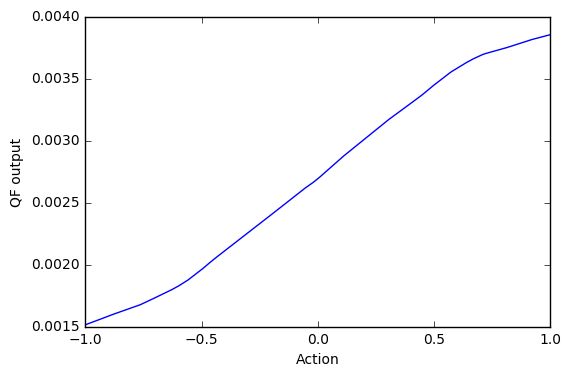

In [6]:
num_actions = 10000

actions = np.linspace(-1, 1, num_actions)
actions = np.expand_dims(actions, axis=1)
random_state_single = np.random.rand(1, o_dim)
random_state = np.vstack([random_state_single for _ in range(num_actions)])

feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
qf_output = qf.sess.run(
    qf.output,
    feed_dict=feed_dict
)

plt.plot(actions, qf_output)
plt.xlabel('Action')
plt.ylabel('QF output')
plt.show()

# Inspect correctness of this quadratic function

In [7]:
feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
L_params, L, implicit_policy_output = qf.sess.run(
    [qf._internal_qf.L_params.output, qf._internal_qf.L, qf.implicit_policy.output],
    feed_dict=feed_dict
)

expected_values = -0.5 * ((actions - implicit_policy_output) * L[0][0][0])**2
plt.plot(actions, expected_values)
plt.xlabel('Action')
plt.ylabel('Expected QF output')
plt.show()

AttributeError: 'FeedForwardCritic' object has no attribute '_internal_qf'

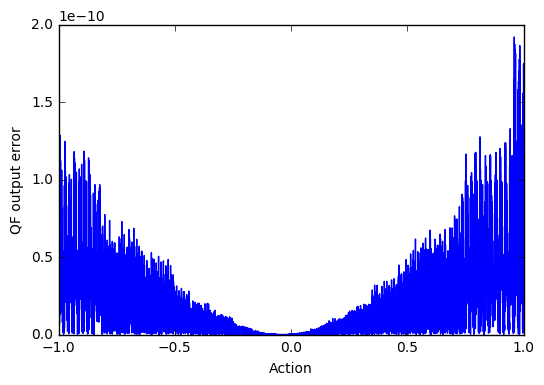

In [131]:
plt.plot(actions, np.abs(expected_values - qf_output))
plt.xlabel('Action')
plt.ylabel('QF output error')
plt.show()

Make sure diagonal values are exponentiated corrected

In [132]:
print(L[0])
print(np.exp(L_params[0]))

[[ 0.04021066]]
[ 0.04021066]


Make sure max action is the one taken by the implicit policy

In [133]:
max_index = np.argmax(qf_output, axis=0)
print(actions[max_index])
print(implicit_policy_output[0])

[[-0.04270427]]
[-0.04267078]


# Plot implicit policy

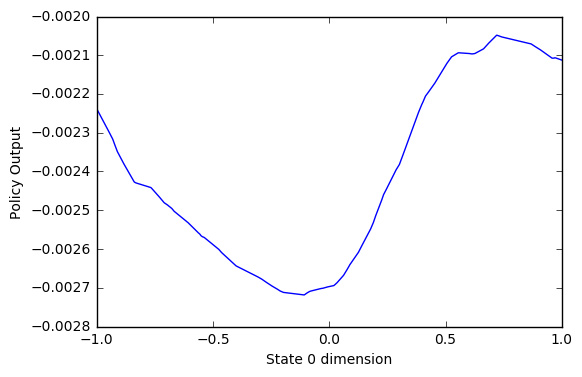

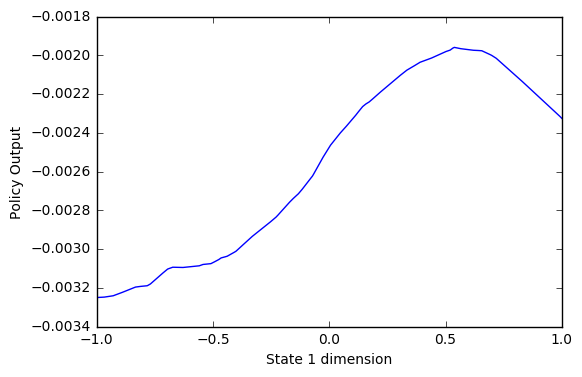

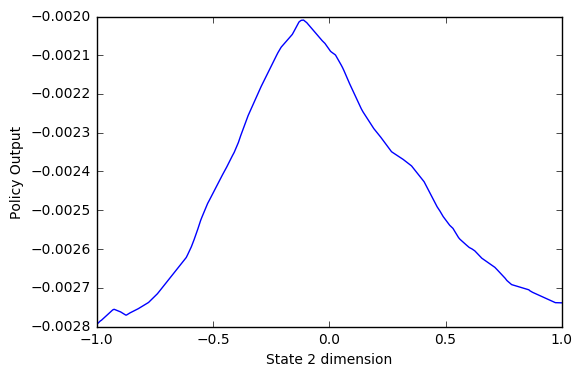

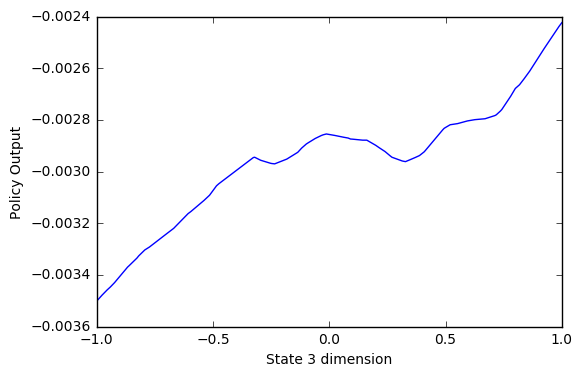

In [8]:
dim_changing = 1
for dim_changing in range(4):
    num_states = 1000
    random_state2 = np.random.rand(1, o_dim)
    linear_states = np.vstack([random_state2 for _ in range(num_states)])
    linear_states[:, dim_changing] = np.linspace(o_low, o_high, num_states)
#     print(linear_states.shape)
    
    policy_output = np.vstack([qf.sess.run(
        policy.output,
        feed_dict={
            policy.observation_input: np.array([state]),
        }
    ) for state in linear_states])
    policy_logits = np.arctanh(policy_output)
    
    plt.plot(linear_states[:, dim_changing], policy_output)
    plt.xlabel('State {0} dimension'.format(dim_changing))
    plt.ylabel('Policy Output')
    plt.show()